# Plotting with seaborn

_Author: Christoph Rahmede_

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1">Load the data</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-2">Heatmap</a></span></li><li><span><a href="#Scatter-plot" data-toc-modified-id="Scatter-plot-3">Scatter plot</a></span></li><li><span><a href="#Line-plot" data-toc-modified-id="Line-plot-4">Line plot</a></span></li><li><span><a href="#Strip-plots-and-swarm-plots" data-toc-modified-id="Strip-plots-and-swarm-plots-5">Strip plots and swarm plots</a></span></li><li><span><a href="#Boxplots" data-toc-modified-id="Boxplots-6">Boxplots</a></span></li><li><span><a href="#Count-plot" data-toc-modified-id="Count-plot-7">Count plot</a></span></li><li><span><a href="#Bar-plot-and-point-plot" data-toc-modified-id="Bar-plot-and-point-plot-8">Bar plot and point plot</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-9">Histograms</a></span></li><li><span><a href="#Violin-plots" data-toc-modified-id="Violin-plots-10">Violin plots</a></span></li><li><span><a href="#KDE-plots" data-toc-modified-id="KDE-plots-11">KDE plots</a></span></li><li><span><a href="#Heat-map" data-toc-modified-id="Heat-map-12">Heat map</a></span></li><li><span><a href="#Regression-plots" data-toc-modified-id="Regression-plots-13">Regression plots</a></span></li><li><span><a href="#Grid-plots" data-toc-modified-id="Grid-plots-14">Grid plots</a></span><ul class="toc-item"><li><span><a href="#Pair-plot" data-toc-modified-id="Pair-plot-14.1">Pair plot</a></span></li><li><span><a href="#Rel-plot" data-toc-modified-id="Rel-plot-14.2">Rel plot</a></span></li><li><span><a href="#Pair-plot-refined" data-toc-modified-id="Pair-plot-refined-14.3">Pair plot refined</a></span></li></ul></li></ul></div>

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

warnings.simplefilter('ignore')

## Load the data

We will be working with the auto-mpg dataset again. We prepare it in the same way.

In [2]:
df = pd.read_csv('../../../dataset-collection/auto-mpg/auto-mpg.csv',
                 sep='\s+', header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'year', 'origin', 'name']
df.drop(df[df.horsepower == '?'].index, inplace=True)
df['horsepower'] = df.horsepower.astype(float)
df['brand'] = df.name.map(lambda x: x.split(' ')[0]
                          ).replace(
    {'toyouta': 'toyota',
     'maxda': 'mazda',
     'chevroelt': 'chevrolet',
     'vw': 'volkswagen',
     'vokswagen': 'volkswagen',
     'mercedes-benz': 'mercedes'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
brand           392 non-null object
dtypes: float64(5), int64(3), object(2)
memory usage: 33.7+ KB


## Heatmap

A heatmap can give us a quick inside into correlations among the variables.

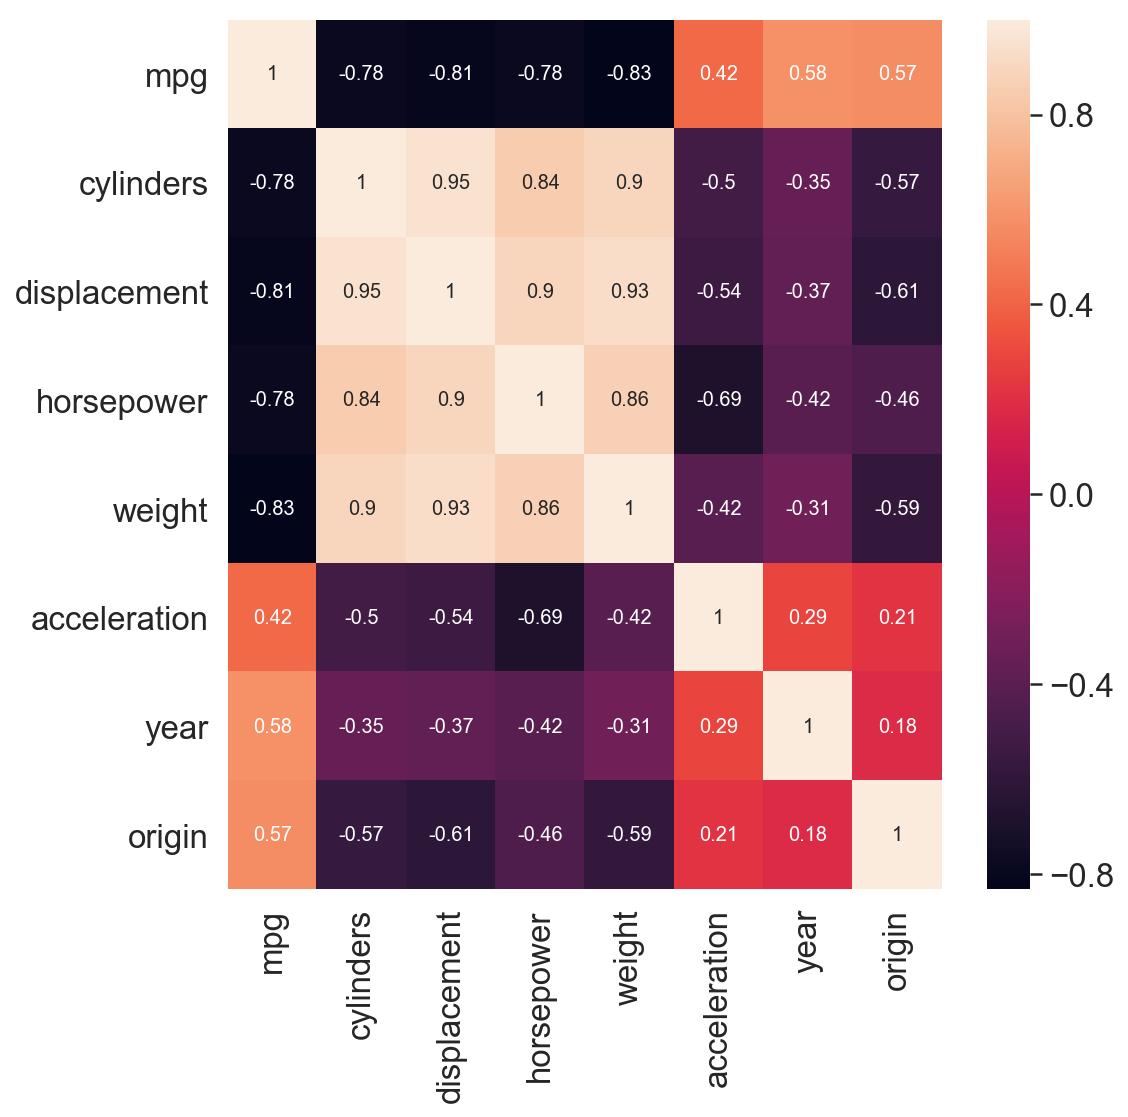

In [3]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Scatter plot

The structure of the scatter plot resembles pandas, but we have an extra `data` argument to pass in the data. Labels are inferred from the column names.

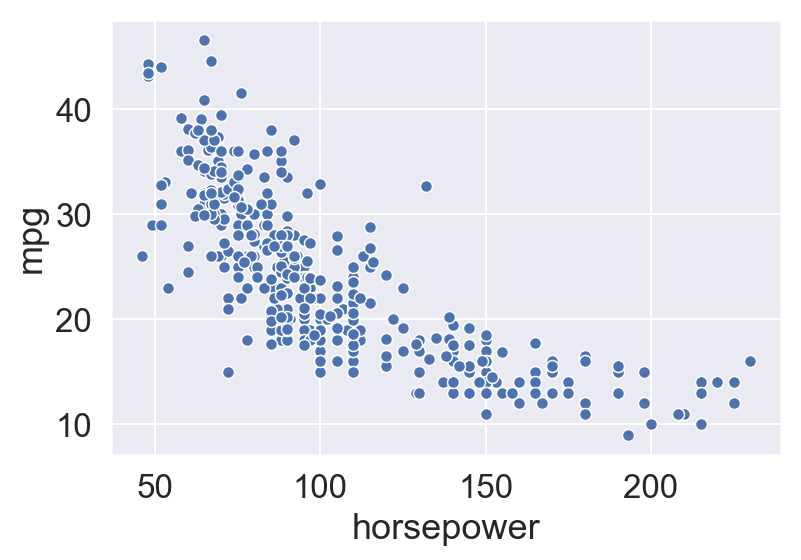

In [4]:
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.show()

We can add further information. For example we can use the `hue` argument for color and the `style` argument for markers to distinguish different groups. One could even add different sizes. Careful with the legend. See what happens if you cut out the additional argument.

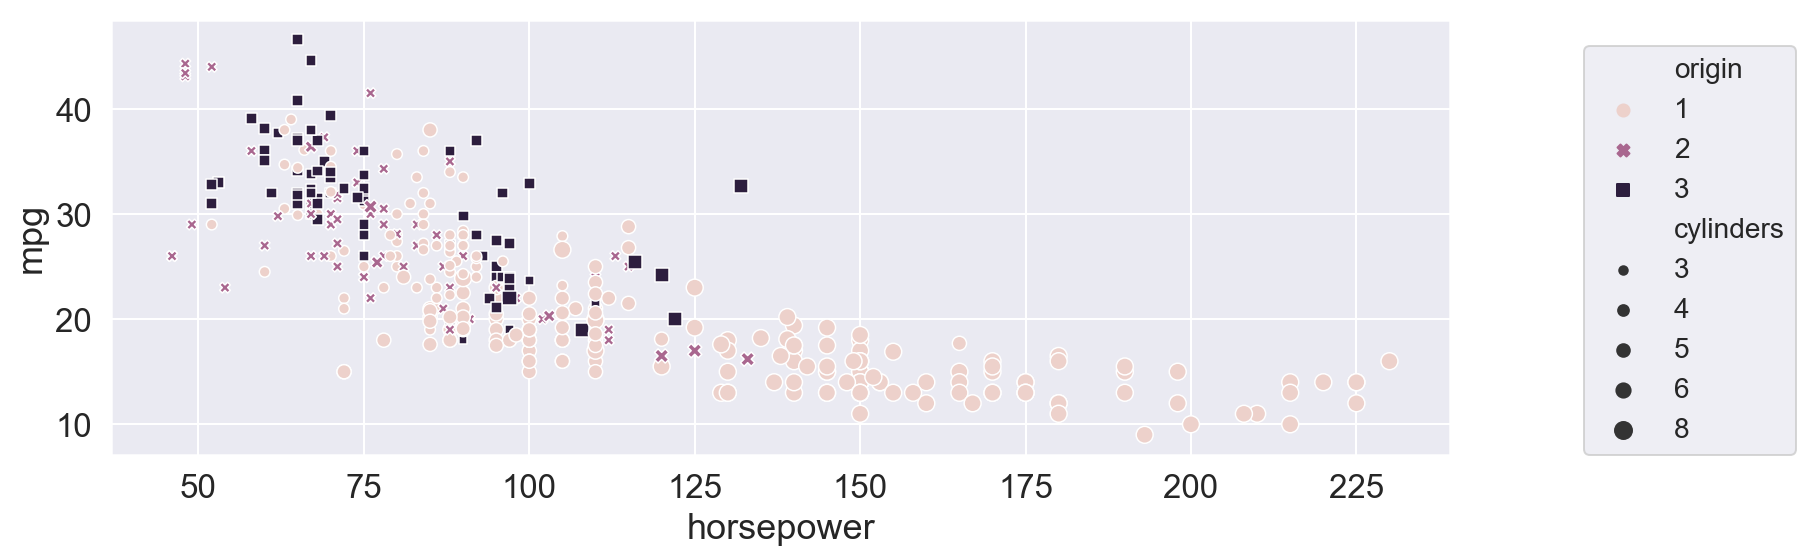

In [5]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(x='horsepower', y='mpg', hue='origin', data=df, size='cylinders',
                style='origin', legend='full')
plt.legend(loc=[1.1, 0], fontsize=14)
plt.show()

## Line plot

This adds lines to the scatter plot. Here we choose to aggregate over values with the same x-value. Confidence intervals from the aggregation procedure can be added with error bars.

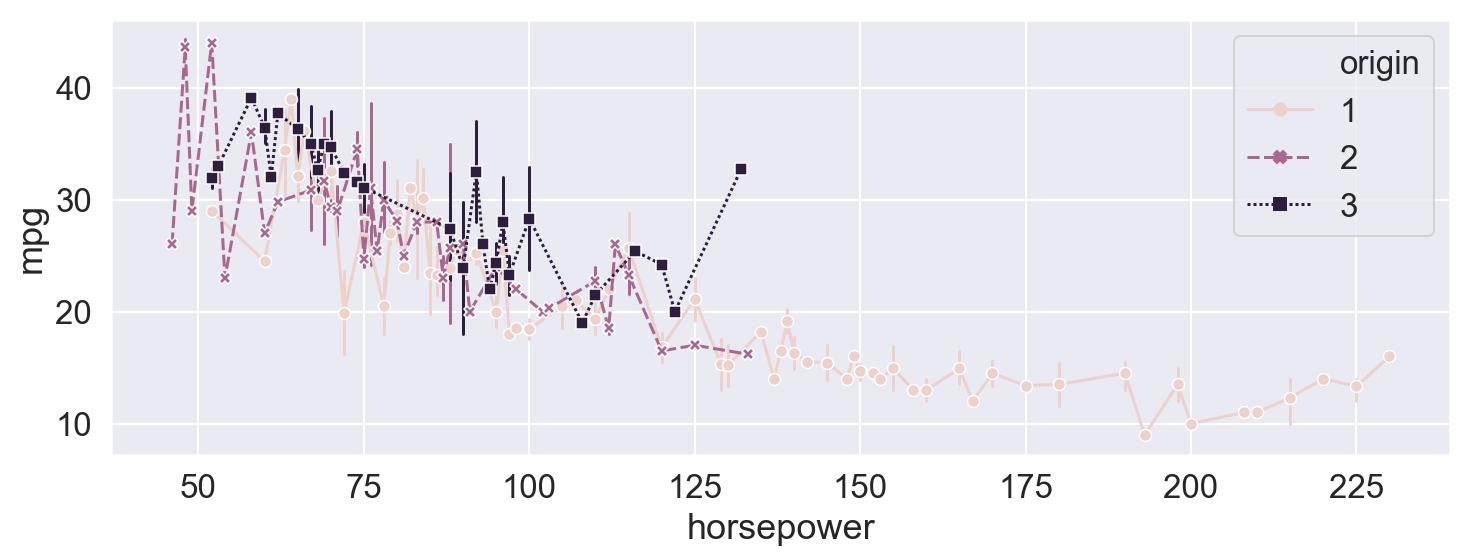

In [6]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(x='horsepower', y='mpg', hue='origin', style='origin',
             data=df, markers=True, hue_order=[1, 2, 3], legend='full',
             err_style='bars', estimator=np.mean, ax=ax)
plt.show()

## Strip plots and swarm plots

A scatter pot is not very useful for plotting continuous versus discrete variables or discrete versus discrete variables.

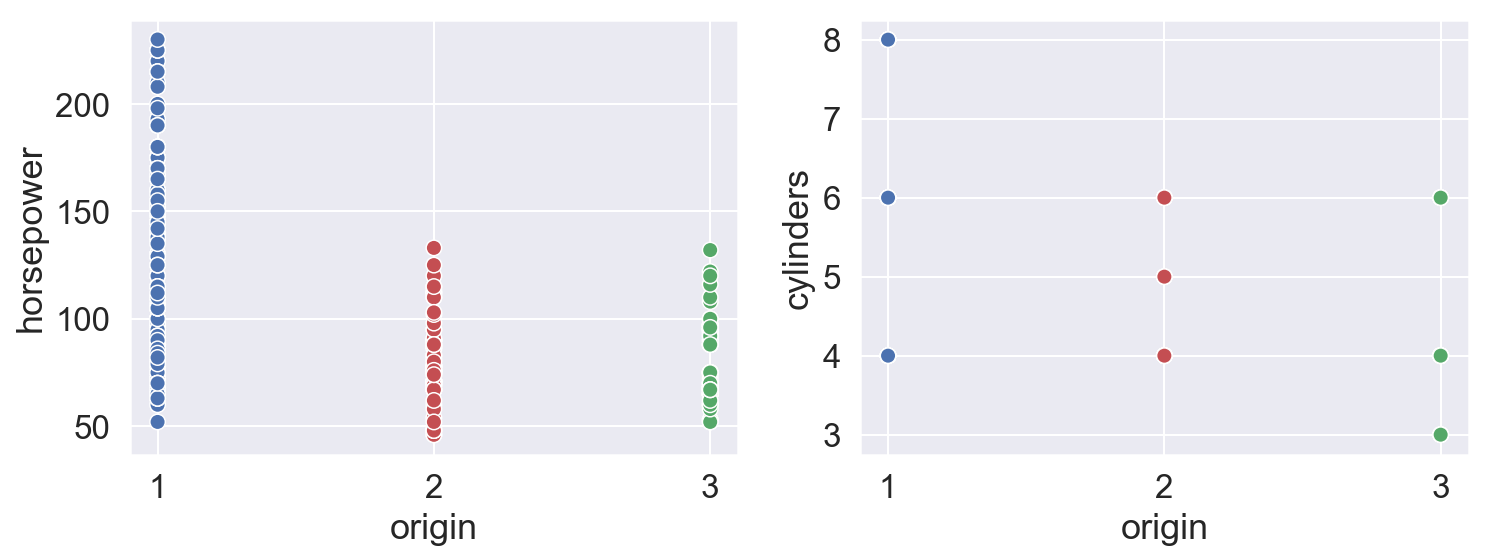

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
sns.scatterplot(x='origin', y='horsepower', data=df,
                ax=ax[0], hue='origin', s=60, legend=False, palette=['b', 'r', 'g'])
ax[0].set_xticks(range(1, 4))
sns.scatterplot(x='origin', y='cylinders', data=df,
                ax=ax[1], hue='origin', s=60, legend=False, palette=['b', 'r', 'g'])
ax[1].set_xticks(range(1, 4))
plt.show()

Better solutions are strip or swarm plots.

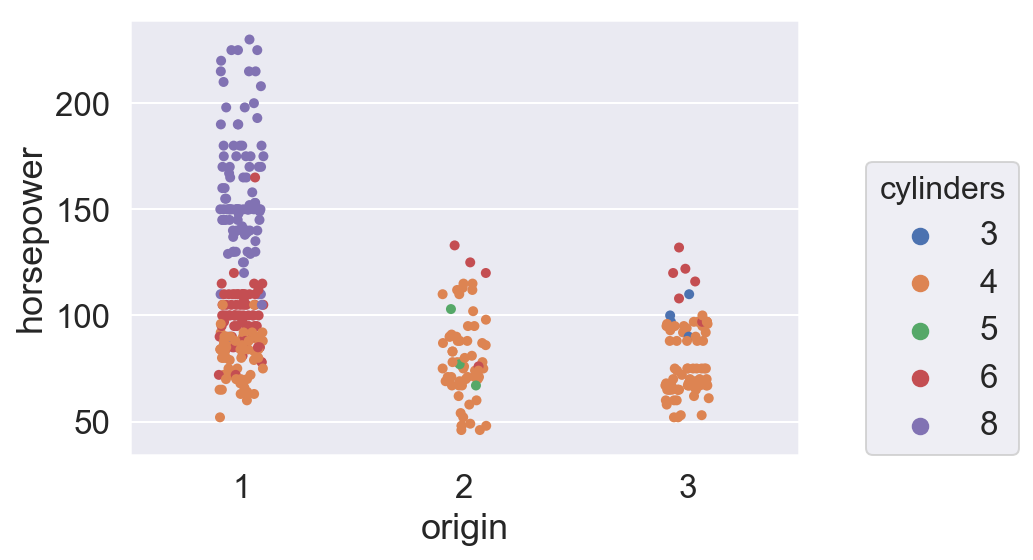

In [8]:
sns.stripplot(x='origin', y='horsepower', hue='cylinders', data=df)
plt.legend(loc=[1.1, 0], title='cylinders', title_fontsize=16)
plt.show()

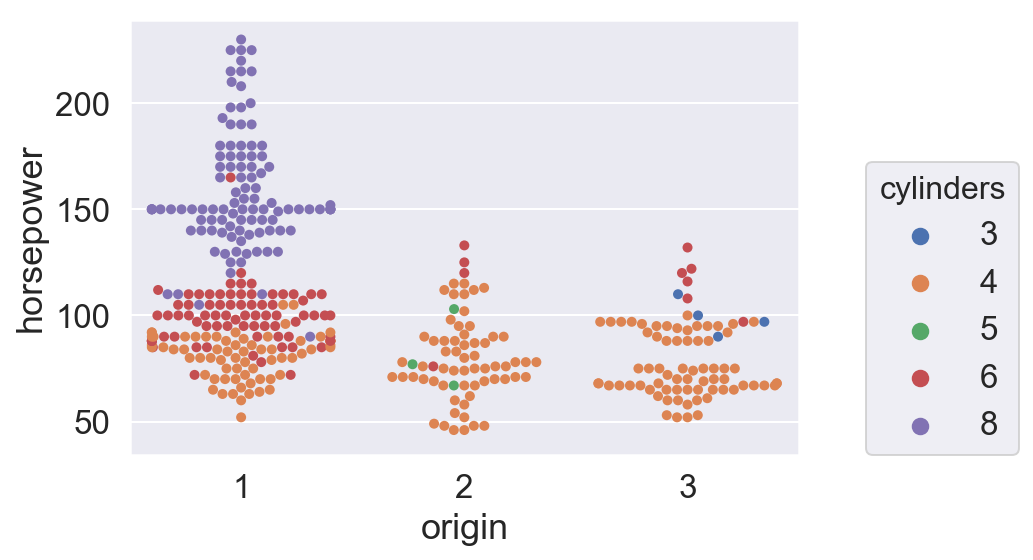

In [9]:
sns.swarmplot(x='origin', y='horsepower', hue='cylinders', data=df)
plt.legend(loc=[1.1, 0], title='cylinders', title_fontsize=16)
plt.show()

## Boxplots

Now we get a nice layout directly.

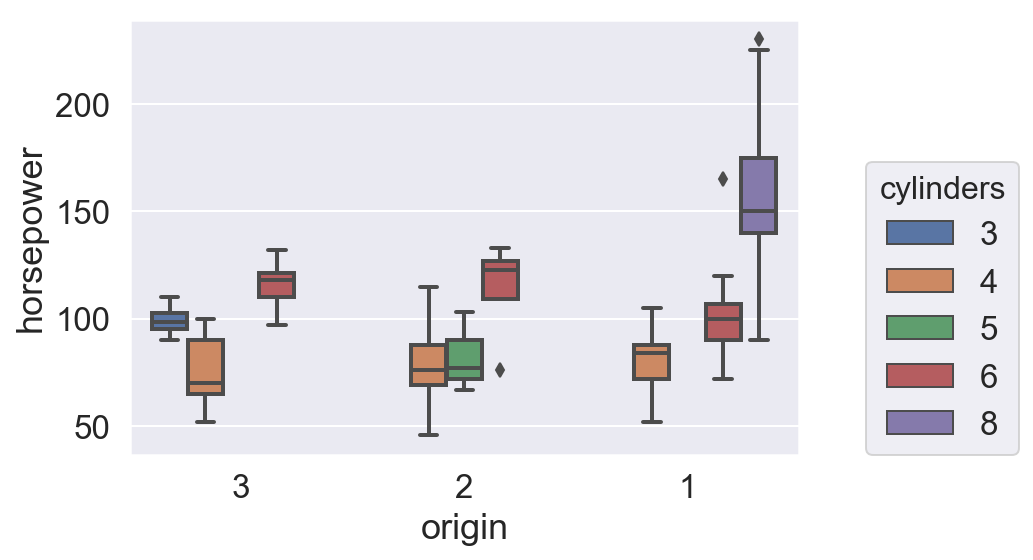

In [10]:
sns.boxplot(x='origin', y='horsepower', hue='cylinders',
            data=df, whis=1.5, orient='v', order=[3, 2, 1], linewidth=2)
plt.legend(loc=[1.1, 0], title='cylinders', title_fontsize=16)
plt.show()

After standardization of all numerical variables, we can also visualize those variables nicely together.

In [11]:
# select numerical variables
df_stand = df.select_dtypes(include=['int', 'float'])
df_stand = (df_stand-df_stand.mean())/df_stand.std()

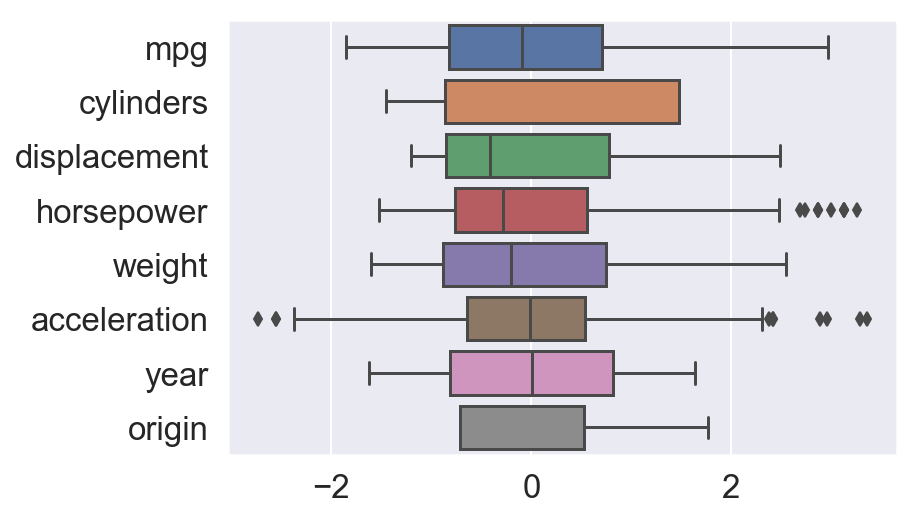

In [12]:
sns.boxplot(data=df_stand, orient='h')
plt.show()

A modern variation of the boxplot is given by the boxen plot by narrowing down on smaller and smaller quantile boundaries. This is in particular useful for larger datasets where it can be expected to observe higher numbers of outliers.

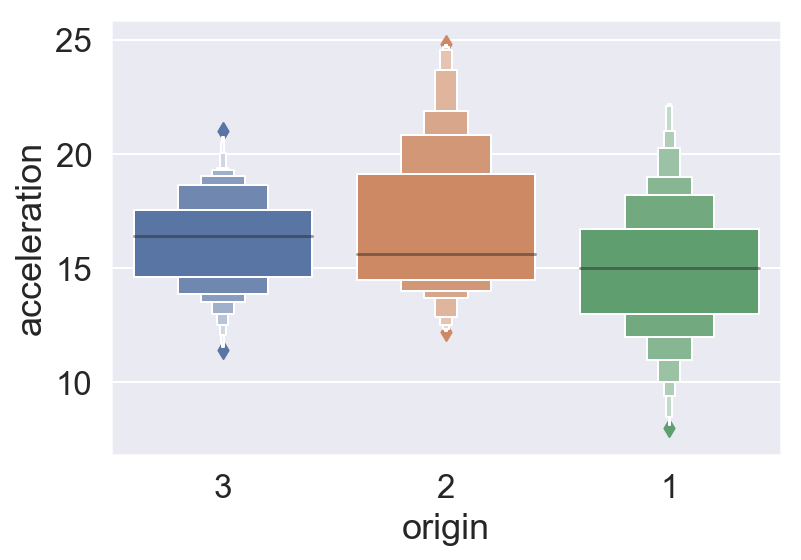

In [13]:
sns.boxenplot(x='origin', y='acceleration', data=df,
              orient='v', order=[3, 2, 1], linewidth=2)
plt.show()

Let's compare to the box plot.

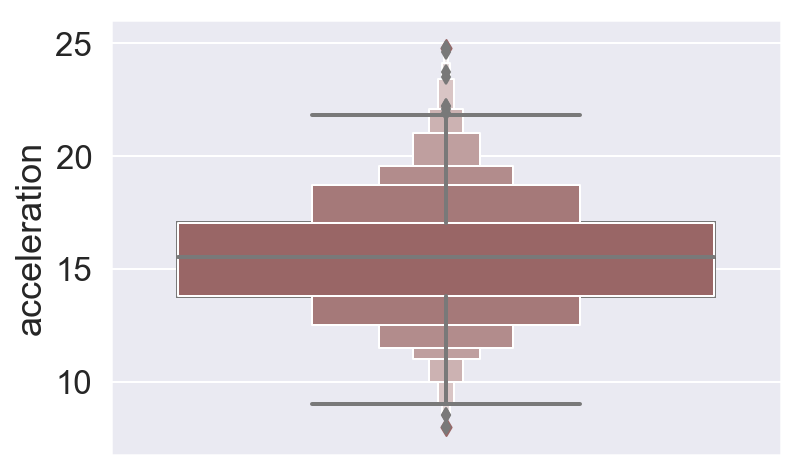

In [14]:
sns.boxplot(y='acceleration', saturation=0.5,
            data=df, whis=1.5, orient='v', linewidth=2, color='lightblue')
sns.boxenplot(y='acceleration', data=df, orient='v',
              linewidth=2, saturation=0.2, color='red')
plt.show()

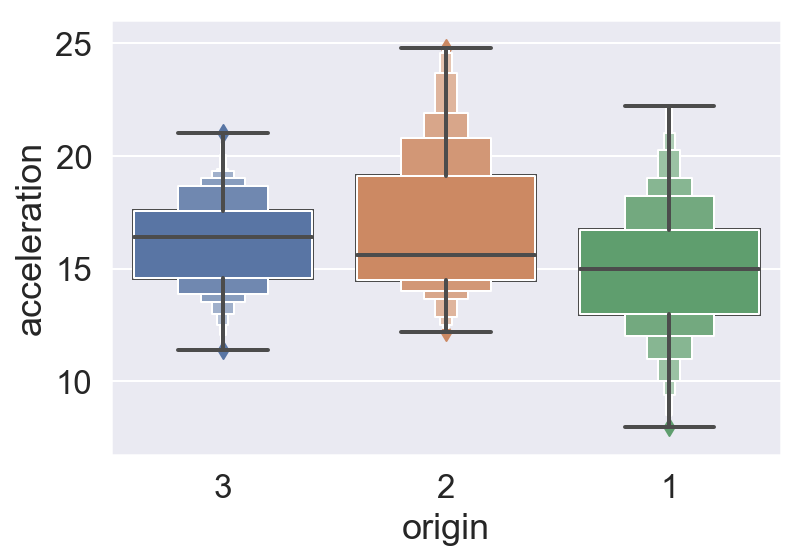

In [15]:
sns.boxplot(x='origin', y='acceleration',
            data=df, whis=1.5, orient='v', order=[3, 2, 1], linewidth=2)
sns.boxenplot(y='acceleration', x='origin', data=df,
              orient='v', order=[3, 2, 1], linewidth=2)
plt.show()

## Count plot

We can spare doing the groupby if we use the countplot instead.

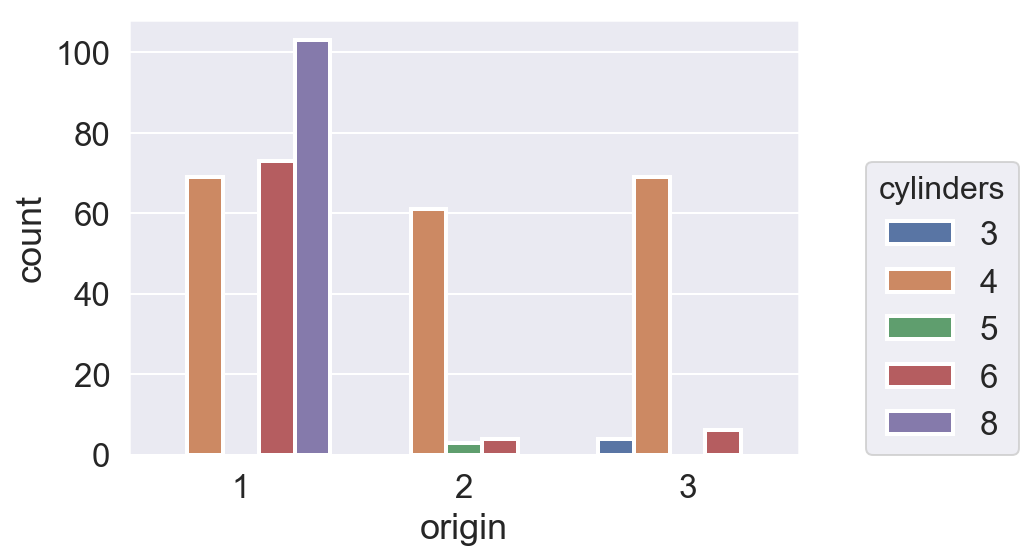

In [16]:
sns.countplot(x='origin', hue='cylinders', data=df,
              orient='v', order=[1, 2, 3], linewidth=2)
plt.legend(loc=[1.1, 0], title='cylinders', title_fontsize=16)
plt.show()

## Bar plot and point plot

Bar plots or point plots allow us to illustrate interaction effect between different discrete factors like the number of cylinders or the origin. Note that we can choose the aggregation function. We can also choose to display confidence interval estimates for the aggregated values.

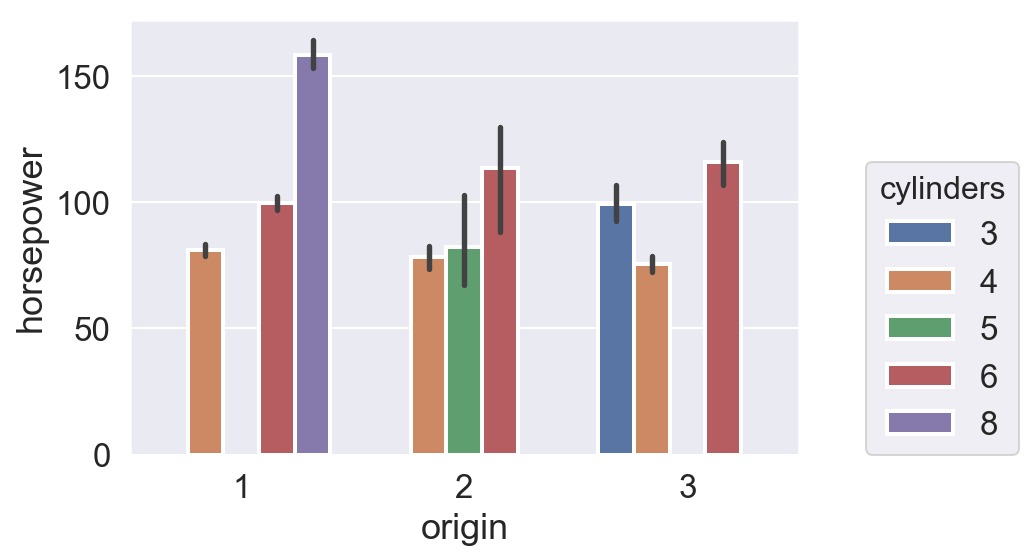

In [17]:
sns.barplot(x='origin', y='horsepower', hue='cylinders', data=df,
            estimator=np.mean, orient='v', order=[1, 2, 3], linewidth=2)
plt.legend(loc=[1.1, 0], title='cylinders', title_fontsize=16)
plt.show()

The point plot makes the influence of the factors even clearer through the straight line connections. We can compare with the dependence obtained by discarding the influence of one factor.

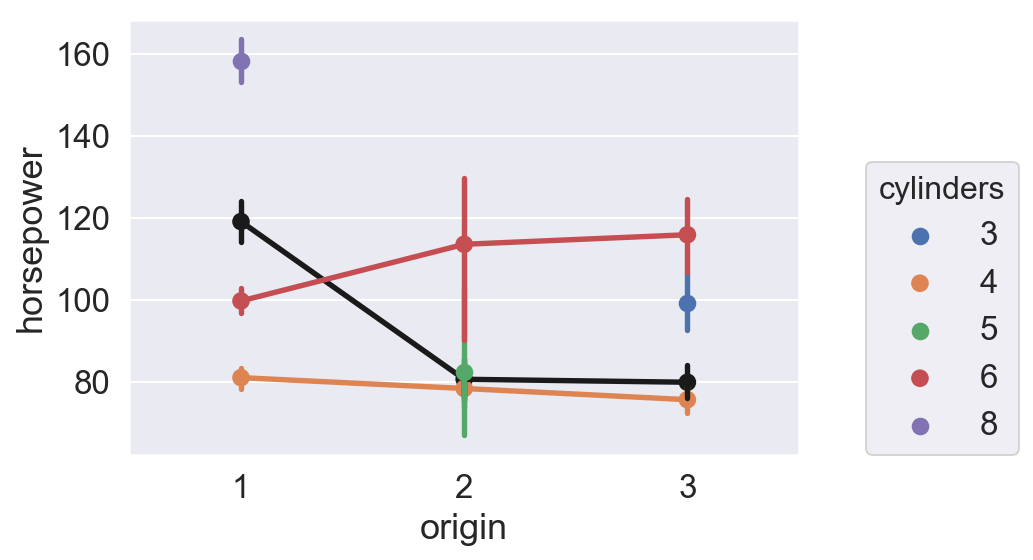

In [18]:
sns.pointplot(x='origin', y='horsepower', hue='cylinders',
              data=df, orient='v', order=(1, 2, 3), linewidth=2)

sns.pointplot(x='origin', y='horsepower', data=df, orient='v',
              order=(1, 2, 3), linewidth=2, linestyle='-.', color='k')
plt.legend(loc=[1.1, 0], title='cylinders', title_fontsize=16)
plt.show()

Let's restrict to the number of cylinders which appear across all origins.

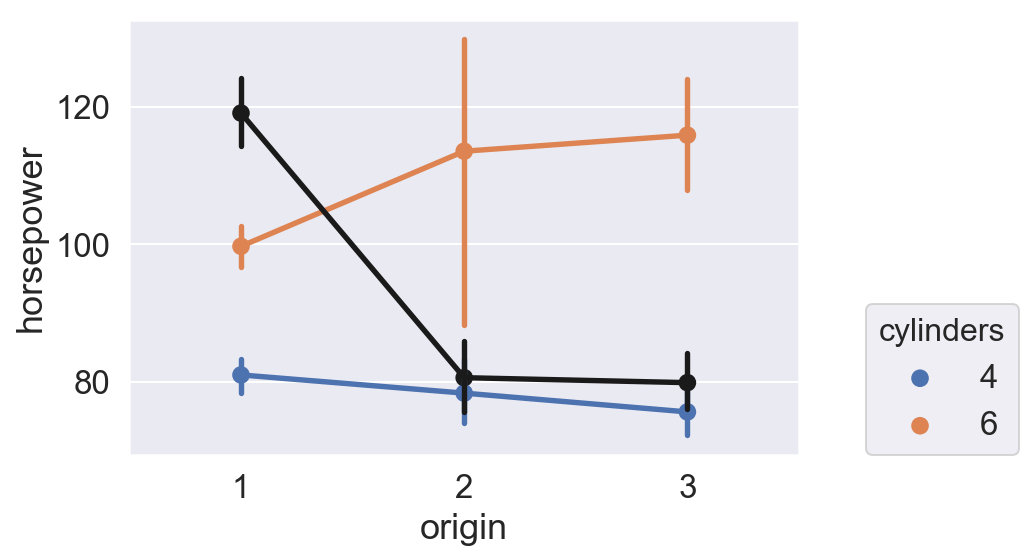

In [19]:
sns.pointplot(x='origin', y='horsepower', hue='cylinders',
              data=df[(df.cylinders == 4) | (df.cylinders == 6)], orient='v', order=(1, 2, 3), linewidth=2)
sns.pointplot(x='origin', y='horsepower', data=df, orient='v',
              order=(1, 2, 3), linewidth=2, linestyle='-.', color='k')
plt.legend(loc=[1.1, 0], title='cylinders', title_fontsize=16)
plt.show()

## Histograms

Histograms come by default with a kernel density estimate. This has to be used with care.

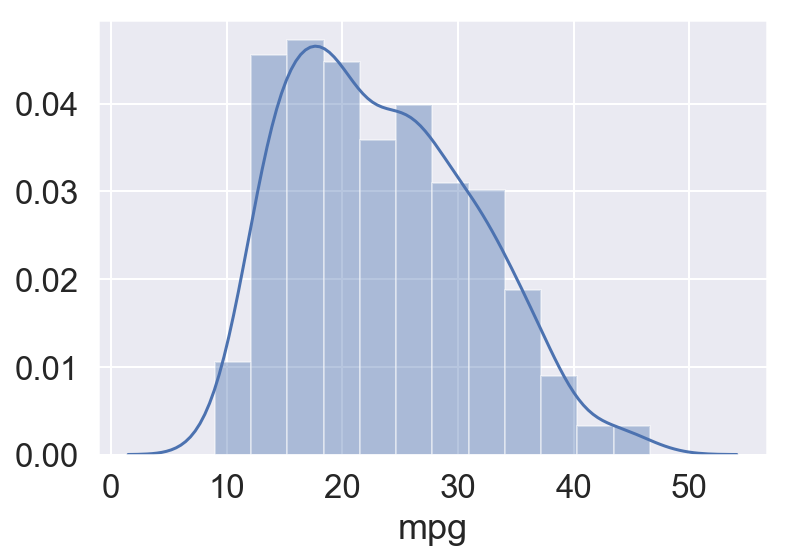

In [20]:
sns.distplot(df.mpg)
plt.show()

Since the `distplot` combines several plots, their individual properties can be adjusted  by the respective keywords. The rug plot depicts where the actual observations are located. The kernel parameters `kernel` and `bw` specify the kernel choice and bandwidth.

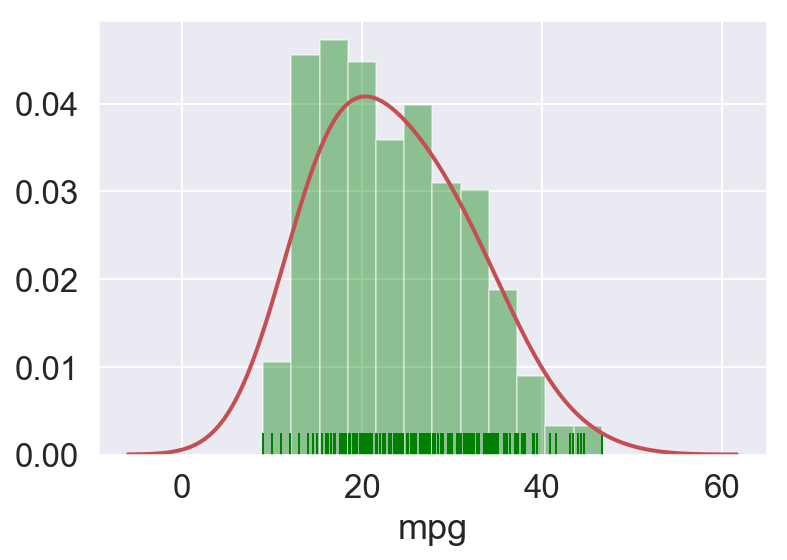

In [21]:
sns.distplot(df.mpg, color='green', rug=True,
             rug_kws={'height': 0.05},
             kde_kws={'bw': 5, 'kernel': 'gau', 'lw': 2, 'color': 'r'})
plt.show()

We can draw a distplot for discrete variables, too. How do you judge that? What are the heights?


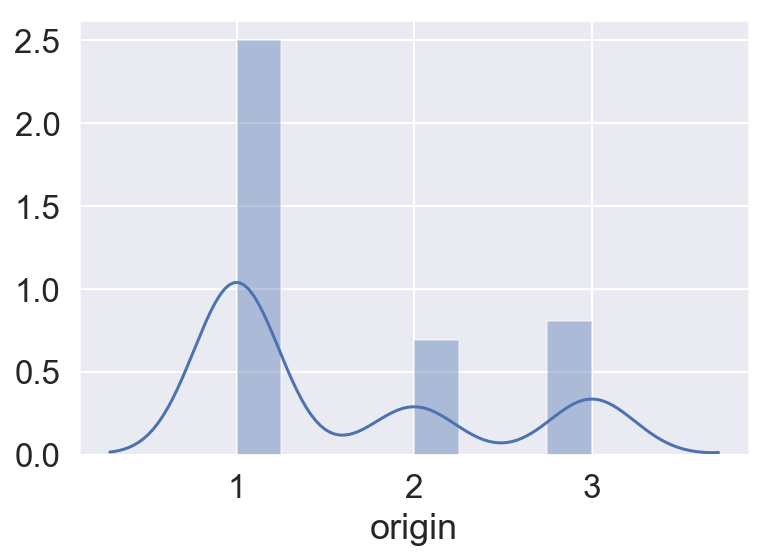

In [22]:
sns.distplot(df.origin, norm_hist=True)
plt.show()

In [23]:
df.origin.value_counts(normalize=True)

1    0.625000
3    0.201531
2    0.173469
Name: origin, dtype: float64

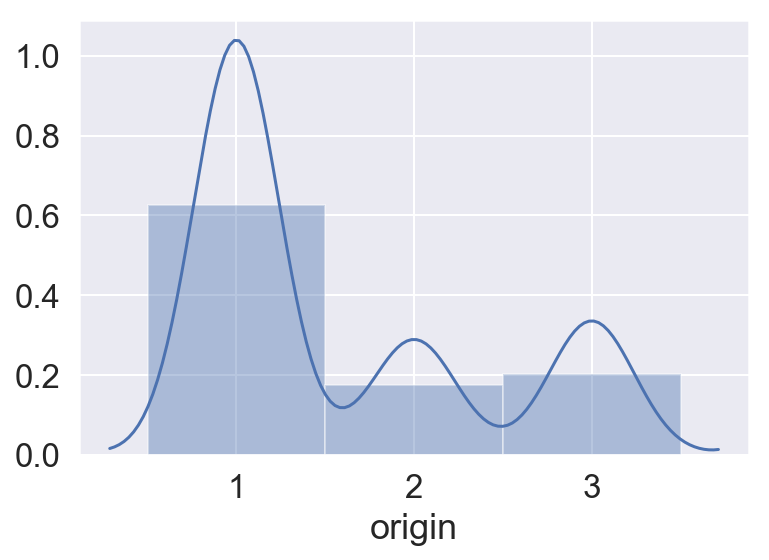

In [24]:
sns.distplot(df.origin, norm_hist=True, bins=0.5+np.arange(0, 4, 1))
plt.show()

## Violin plots

The violinplot allows to combine kde-estimates with boxplots. The problems with kde estimates remain.

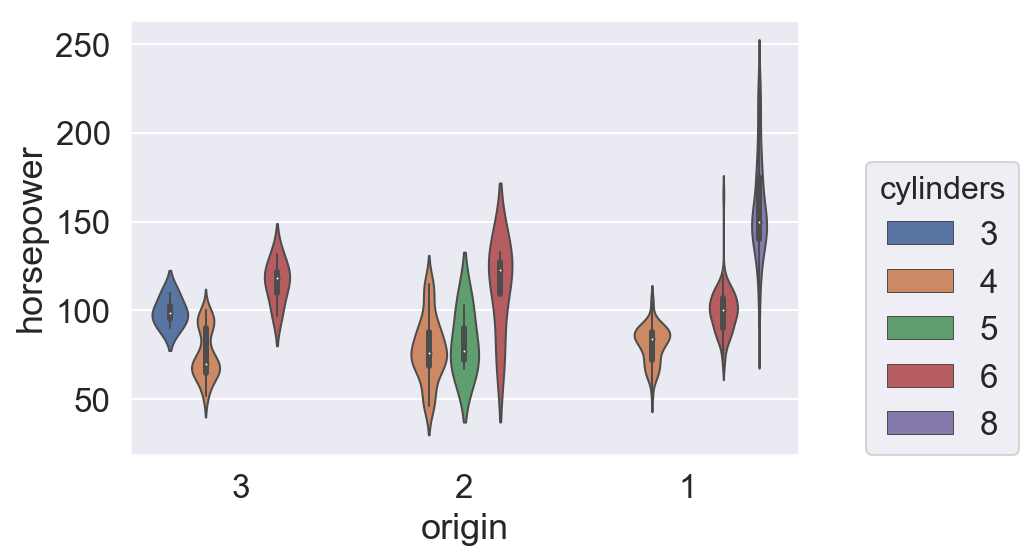

In [25]:
sns.violinplot(x='origin', y='horsepower', hue='cylinders',
               data=df, orient='v', order=[3, 2, 1], width=0.8, linewidth=1)
plt.legend(loc=[1.1, 0], title='cylinders', title_fontsize=16)
plt.show()

## KDE plots

KDE plots depict the kernel density estimates. They can be useful for depicting two-dimensional distributions as well.

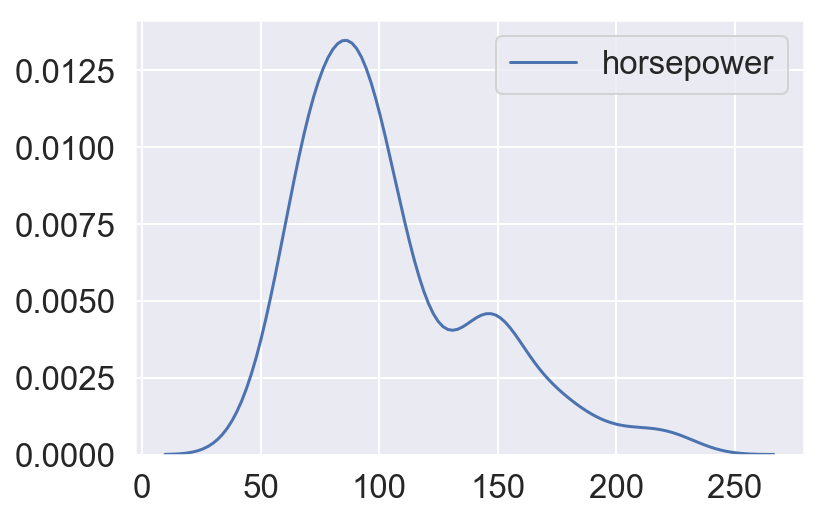

In [26]:
sns.kdeplot(df['horsepower'])
plt.show()

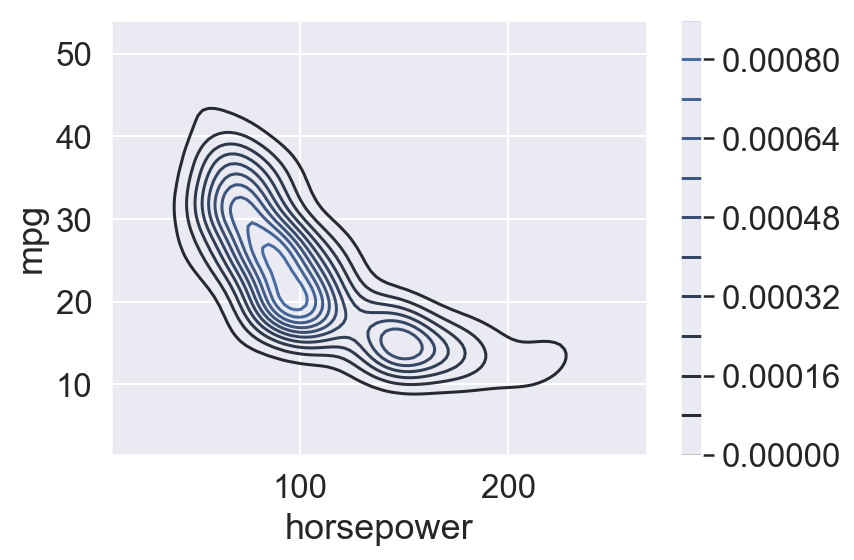

In [27]:
sns.kdeplot(df['horsepower'], df['mpg'], cbar=True)
plt.show()

Scatter plots, kde plots and distribution plots can be combined.

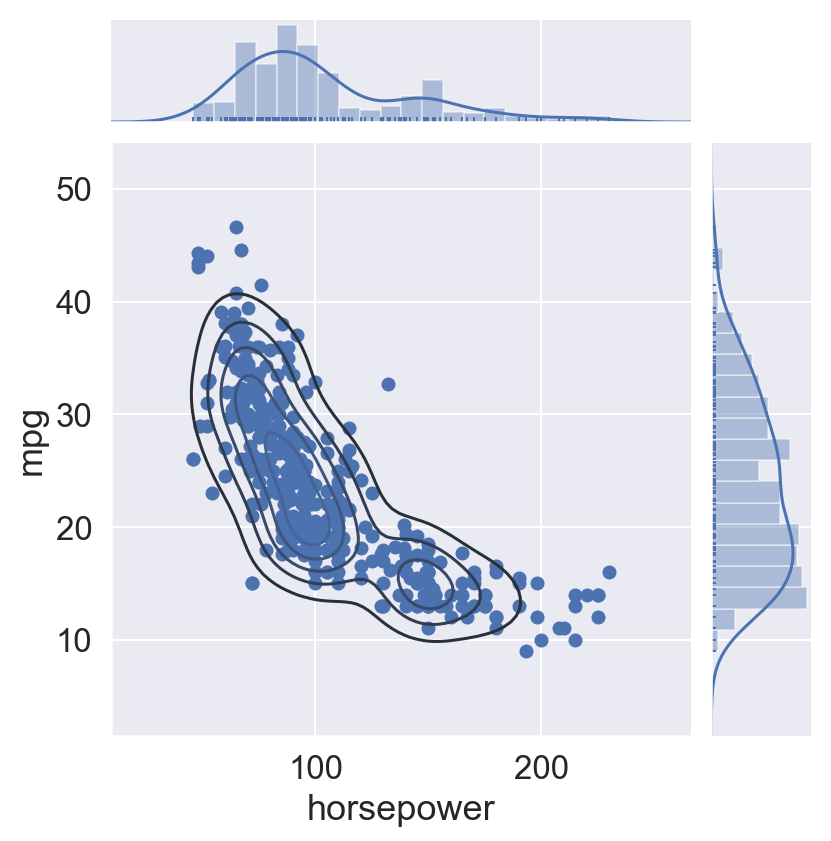

In [28]:
g = sns.jointplot(x='horsepower', y='mpg', data=df, marginal_kws={'kde': True, 'bins': 20, 'rug': True}
                  ).plot_joint(sns.kdeplot, n_levels=6)

## Heat map

A heat map can be used to illustrate the values in any matrix. Most often it is used to inform about the correlations among the features.

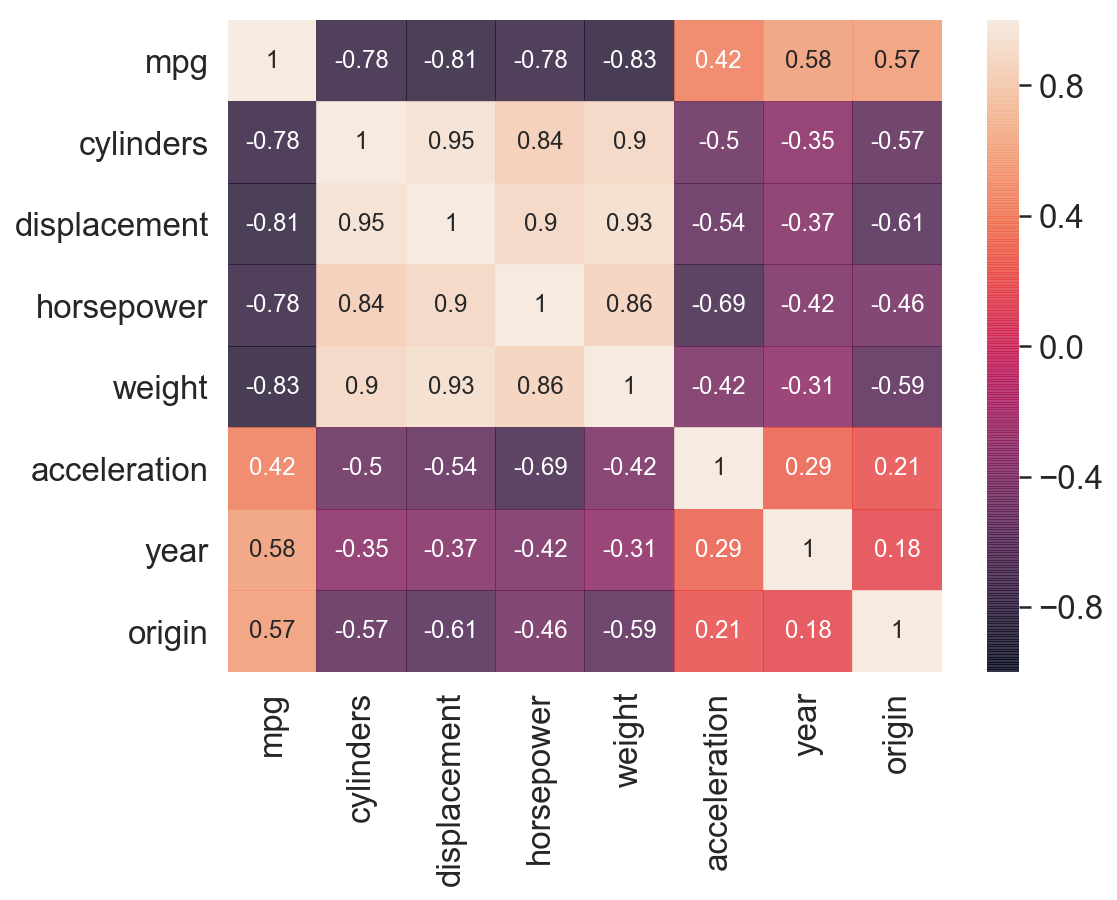

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2g', annot_kws={
            'fontsize': 12}, alpha=0.8, vmin=-1, vmax=1)
plt.show()

## Regression plots

Seaborn allows to fit simple regression models to the data including confidence level estimates.

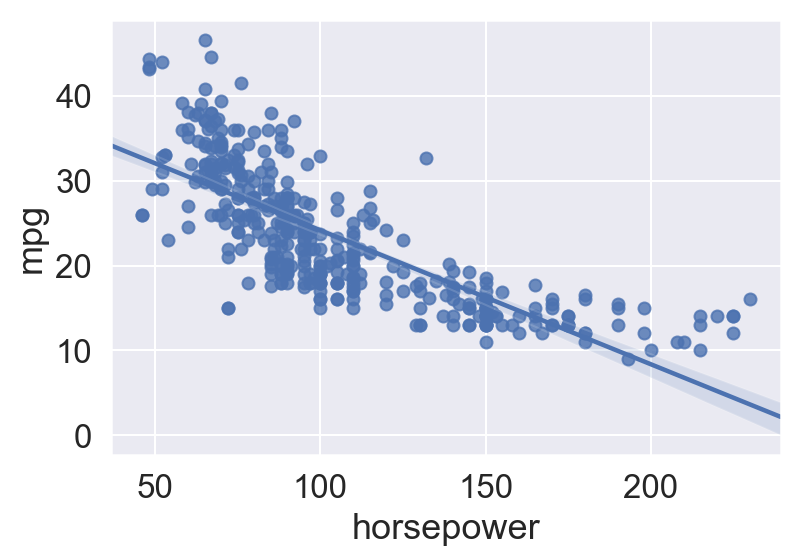

In [30]:
sns.regplot(x='horsepower', y='mpg', data=df)
plt.show()

With `lmplot` we can resolve for additional conditional parameters

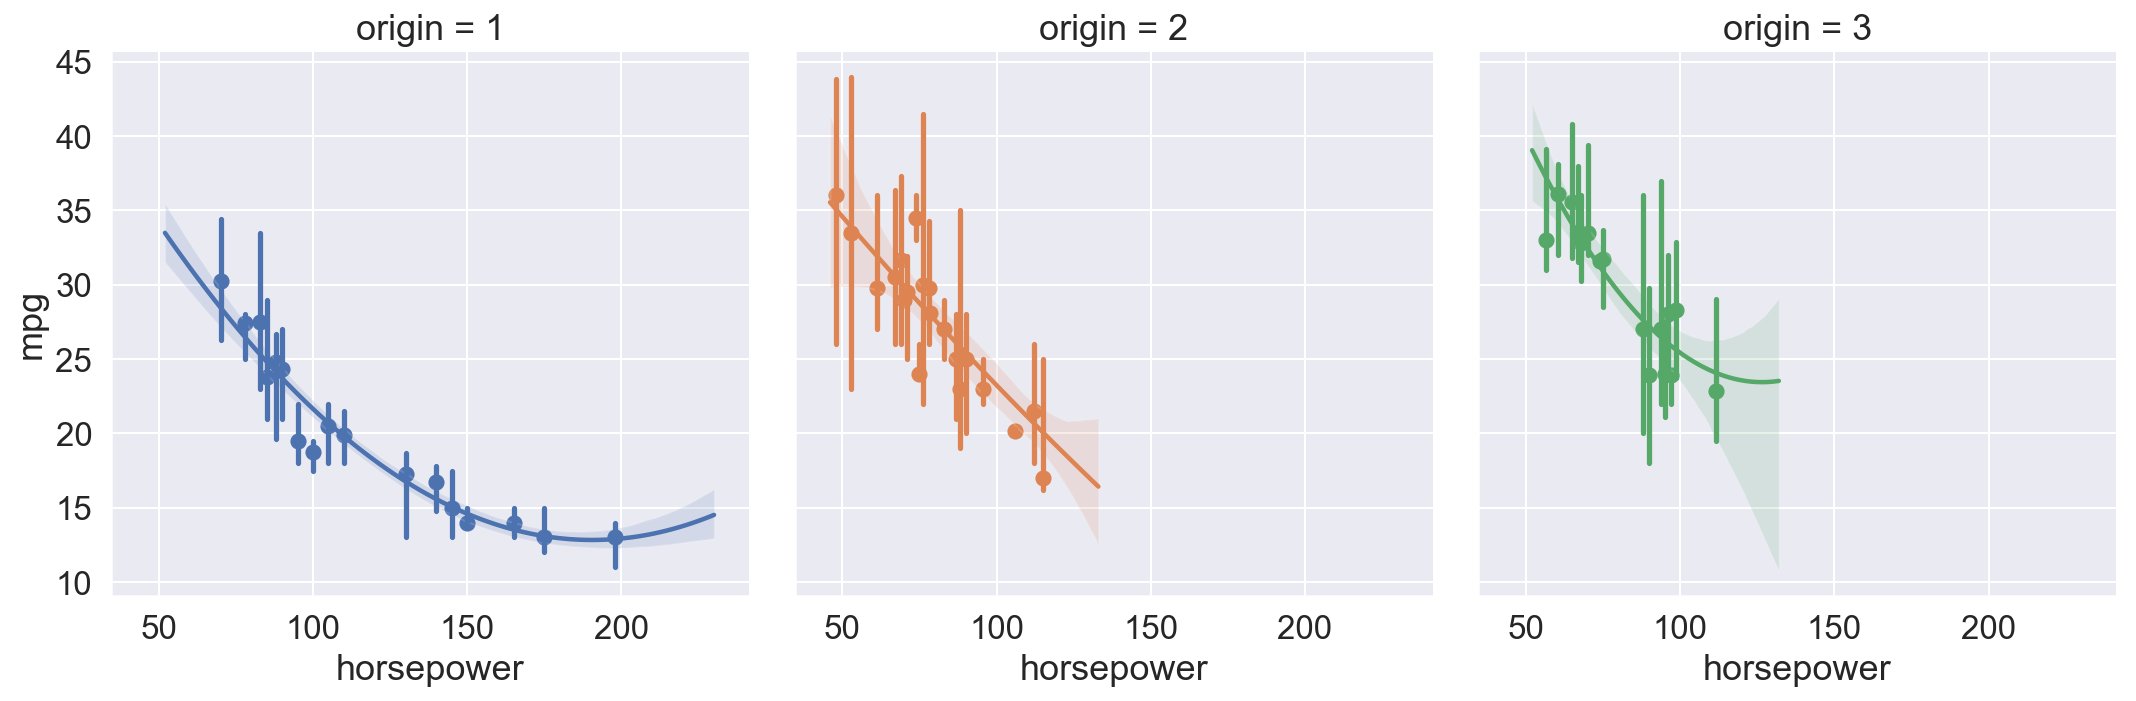

In [31]:
sns.lmplot(x='horsepower', y='mpg', data=df, hue='origin', col='origin',
           sharex=True, sharey=True, x_bins=20, x_estimator=np.median,
           truncate=True, order=2, units='origin')
plt.show()

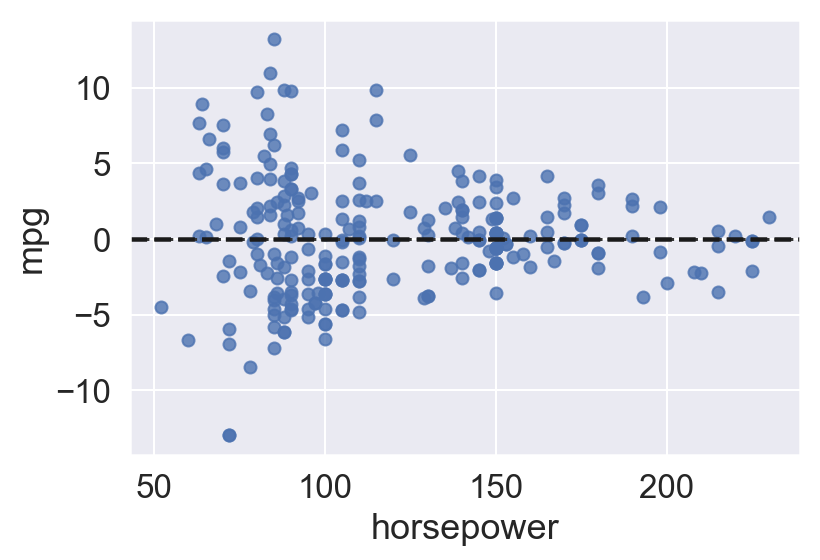

In [32]:
sns.residplot(x='horsepower', y='mpg', data=df[df['origin'] == 1], order=2, lowess=True, line_kws={
              'ls': '--', 'color': 'k'})
plt.show()

## Grid plots

### Pair plot

A pair plot can give a quick visualization of variable distributions and pairwise dependencies.

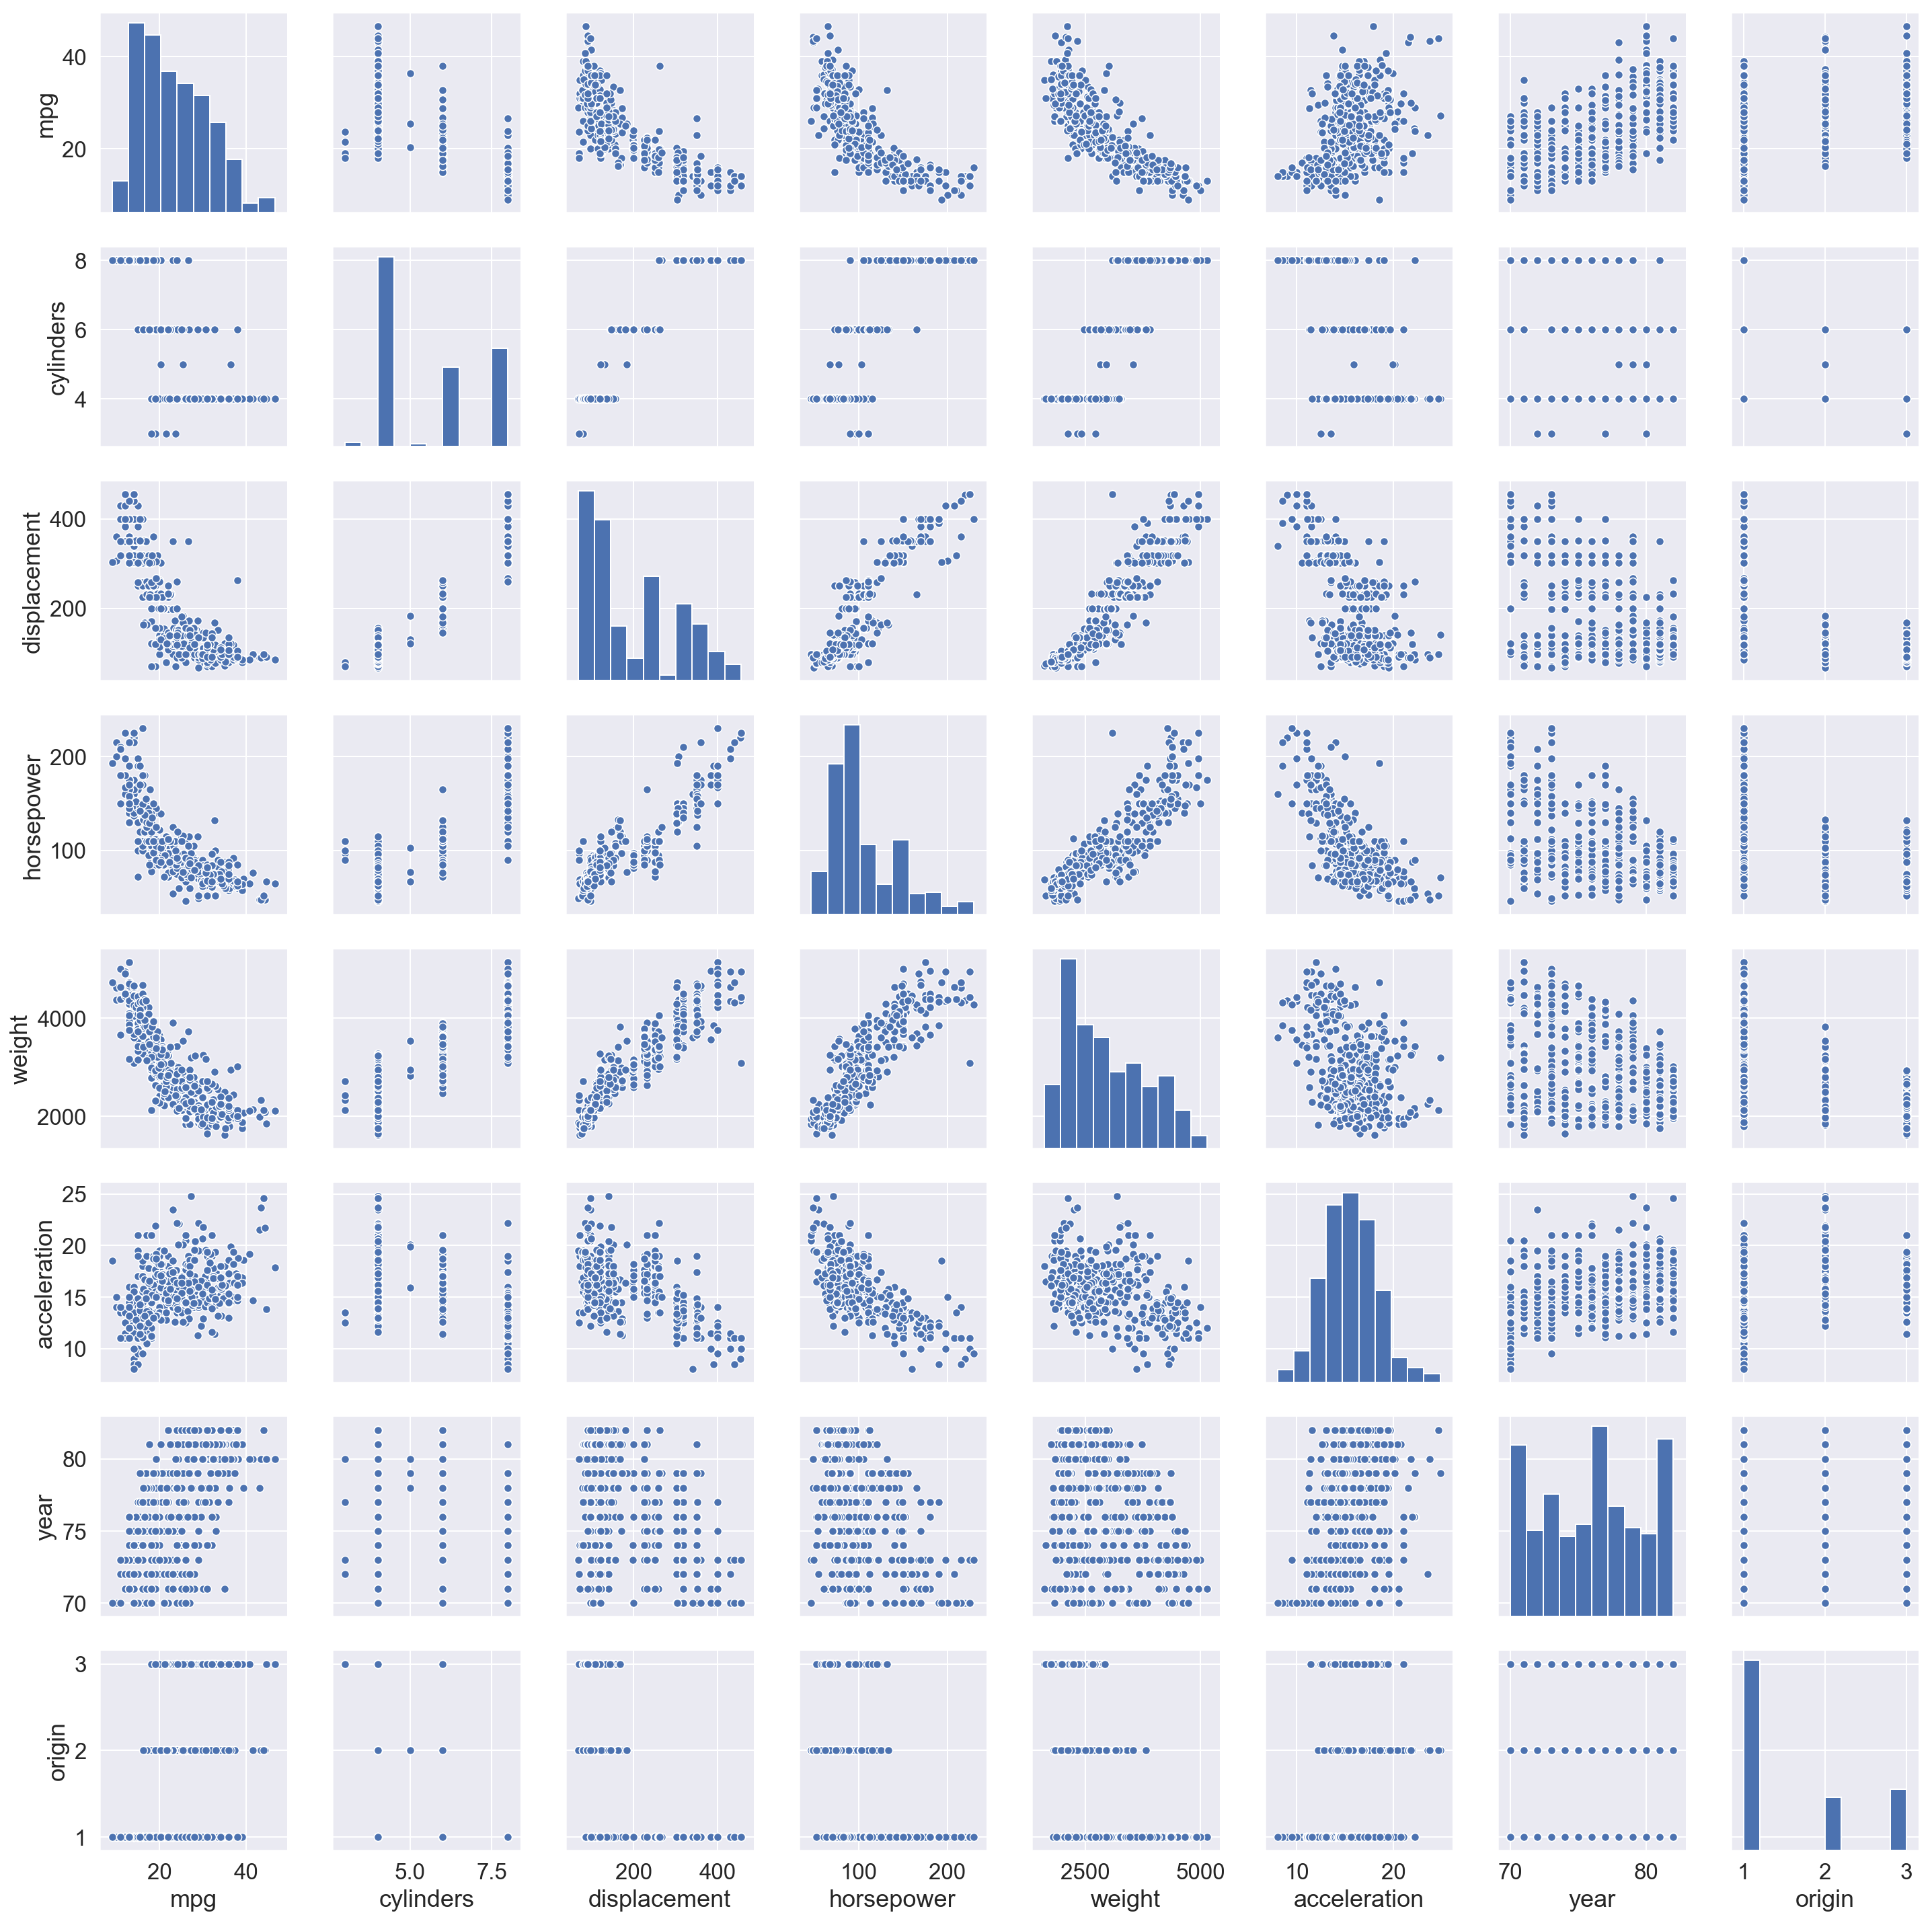

In [33]:
sns.pairplot(df)
plt.show()

### Rel plot

With the Relplot we can resolve for conditional dependencies.

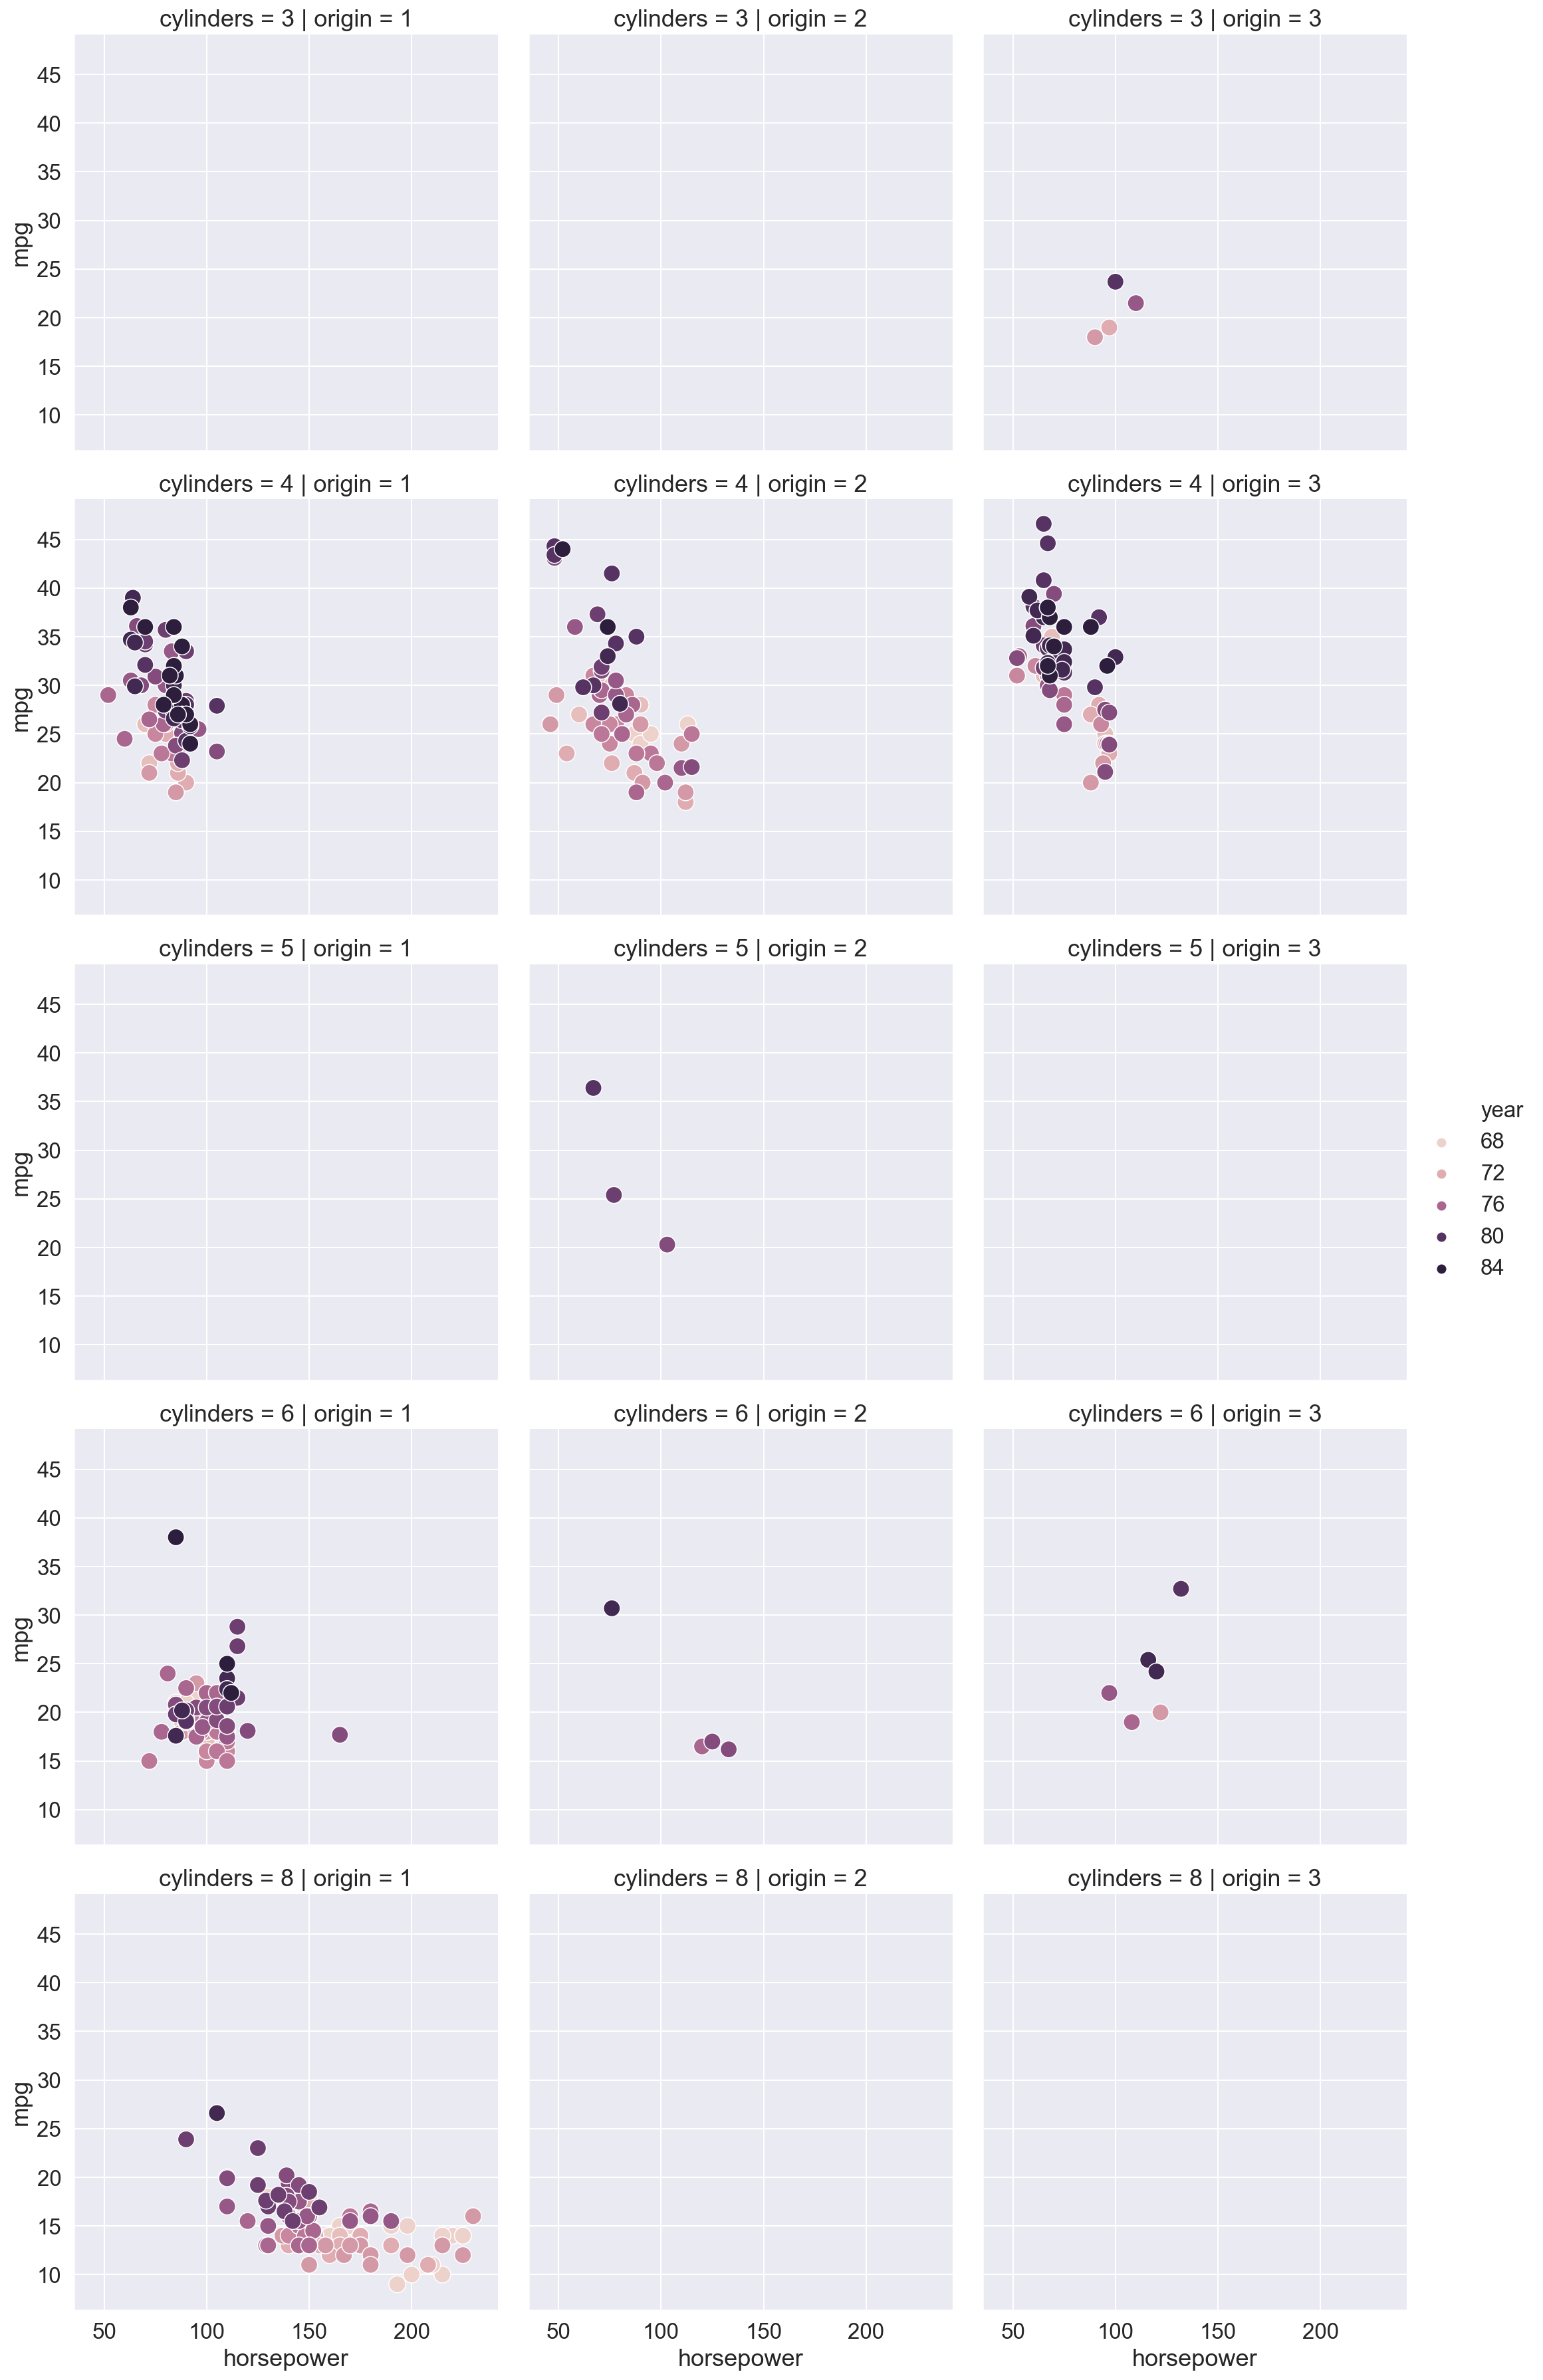

In [34]:
sns.relplot(x='horsepower', y='mpg', col='origin',
            row='cylinders', hue='year', data=df, s=160)
plt.show()

### Pair plot refined

We can add additional information through the `hue` keyword and refine the presentation through the grid structure.

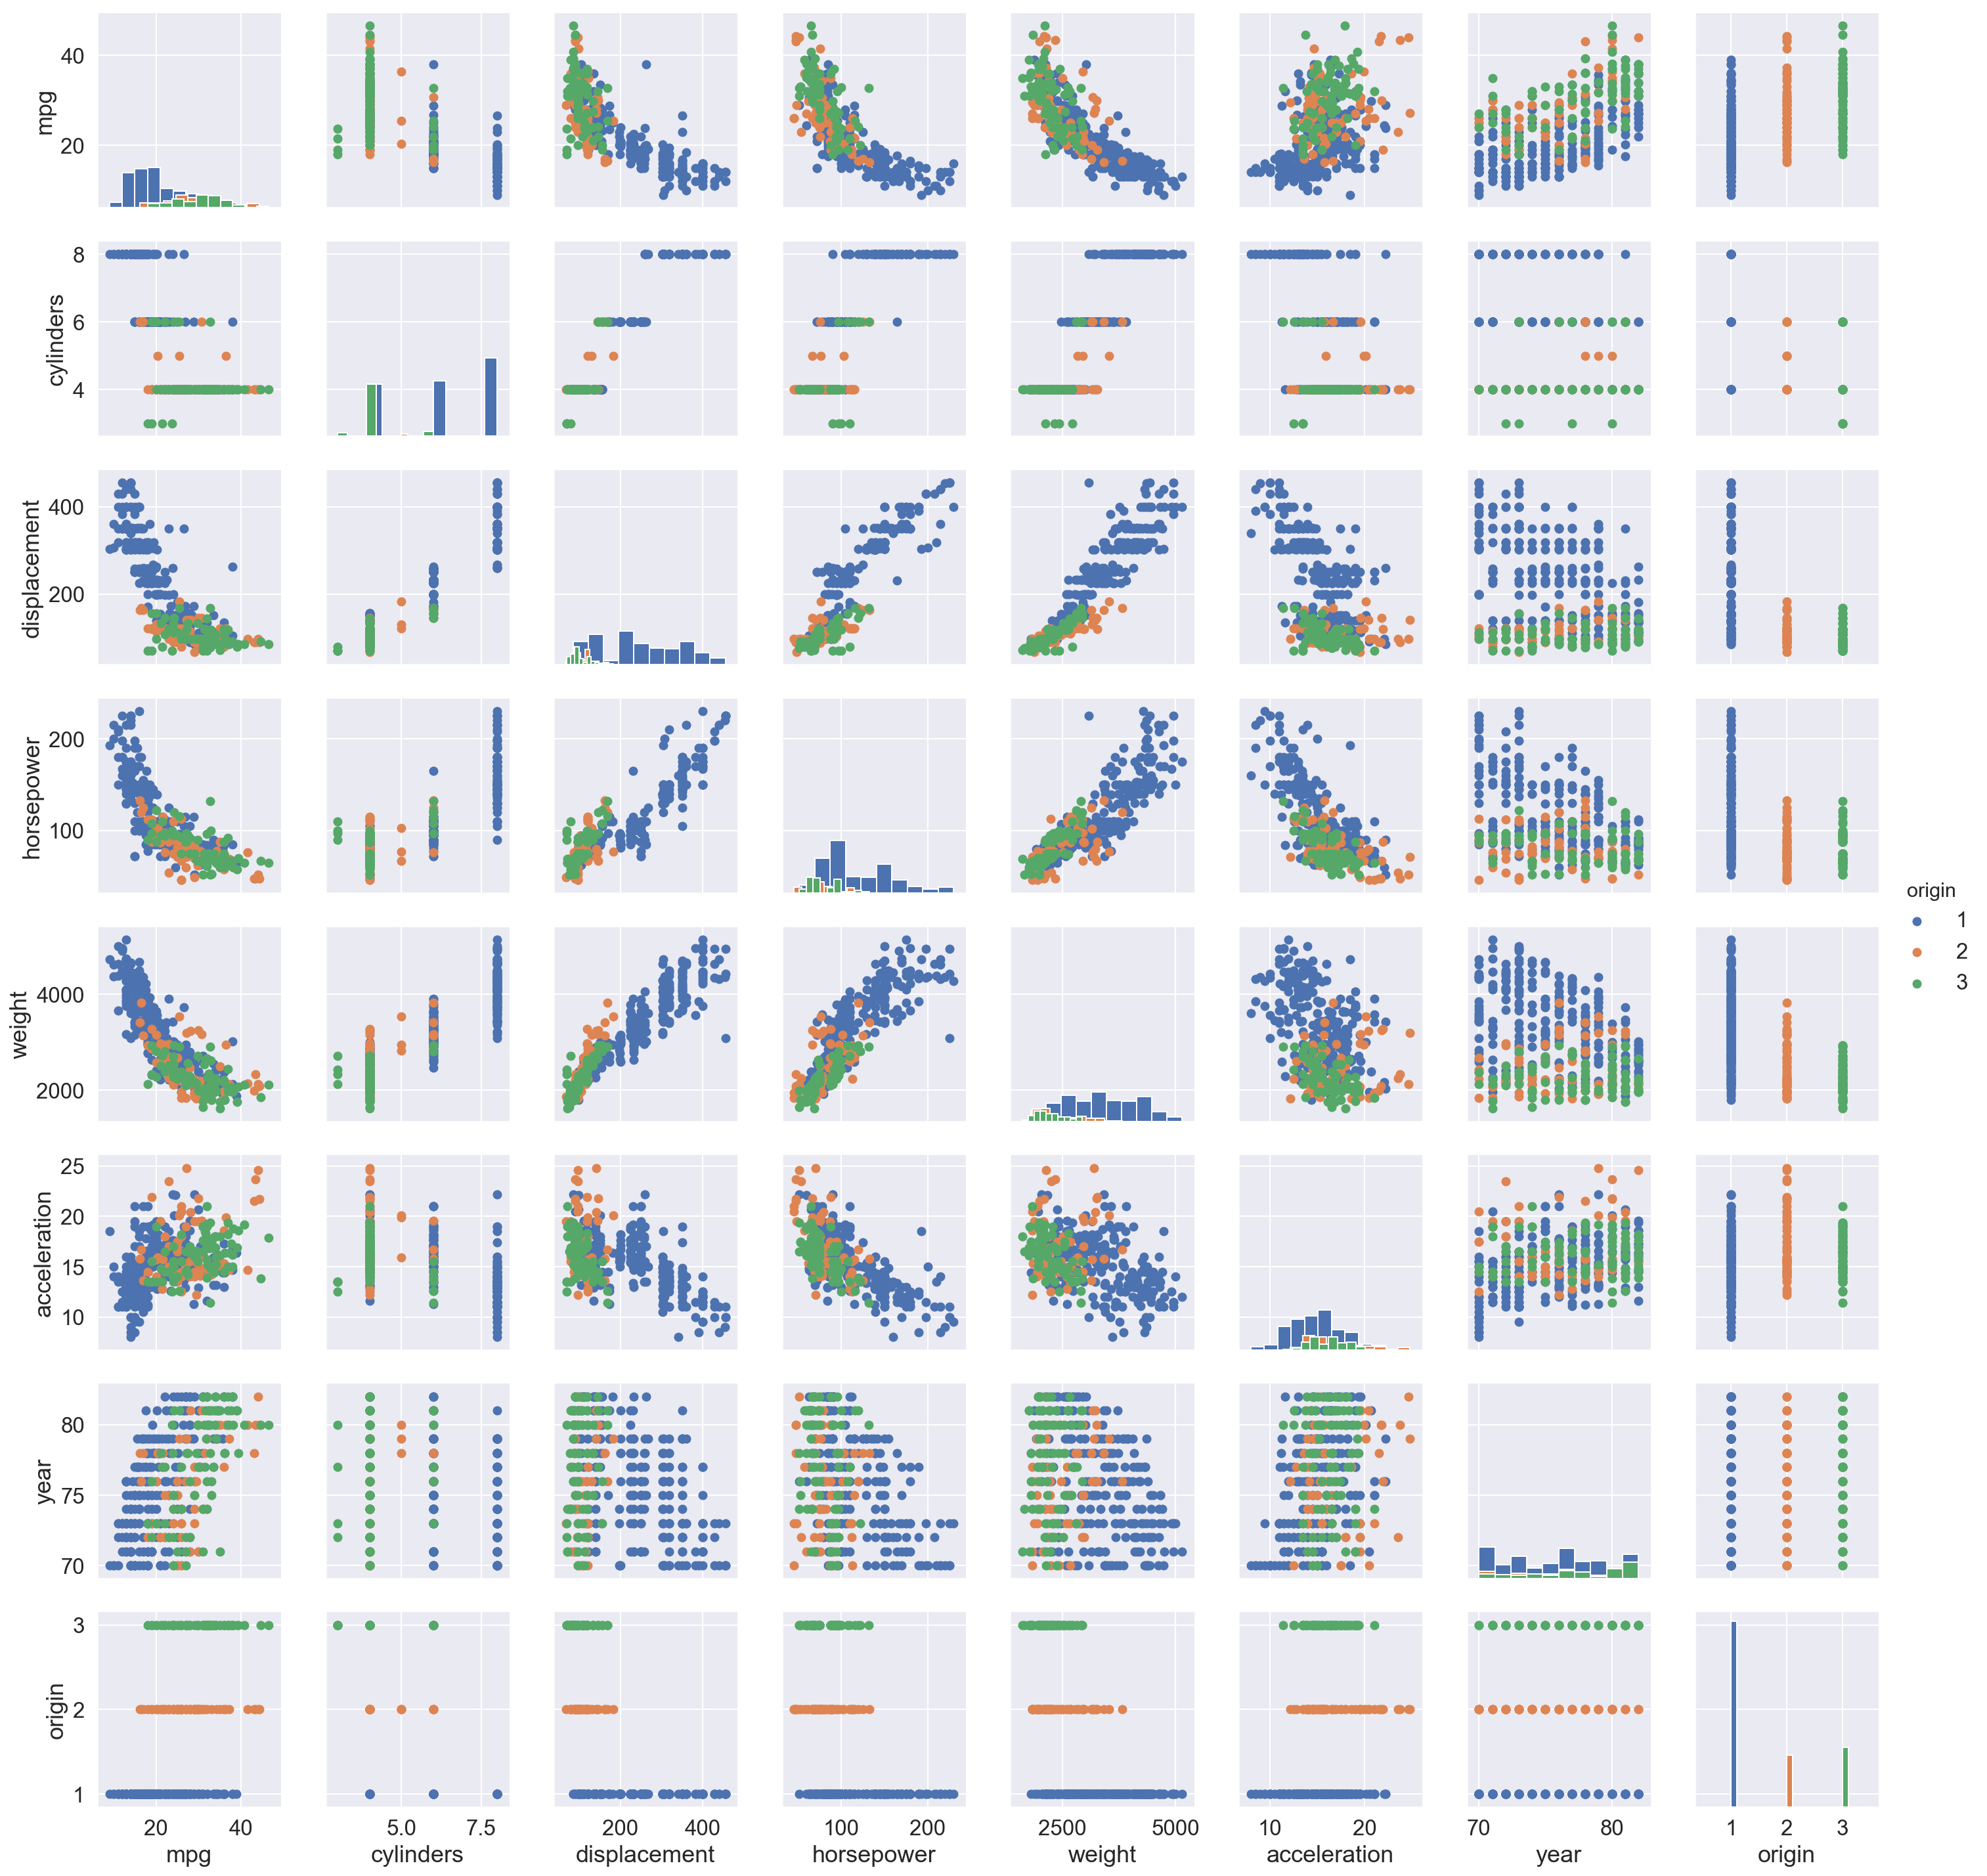

In [35]:
g = sns.PairGrid(df, hue="origin")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

We can get rid of the superfluous symmetry by using different kinds of plots on the upper and lower diagonal. Since those plots are computationally intensive, it might be a good idea to restrict the number of depicted variables.

In [36]:
mask = [col for col in df.columns if col not in [
    'origin', 'name', 'cylinders', 'brand']]

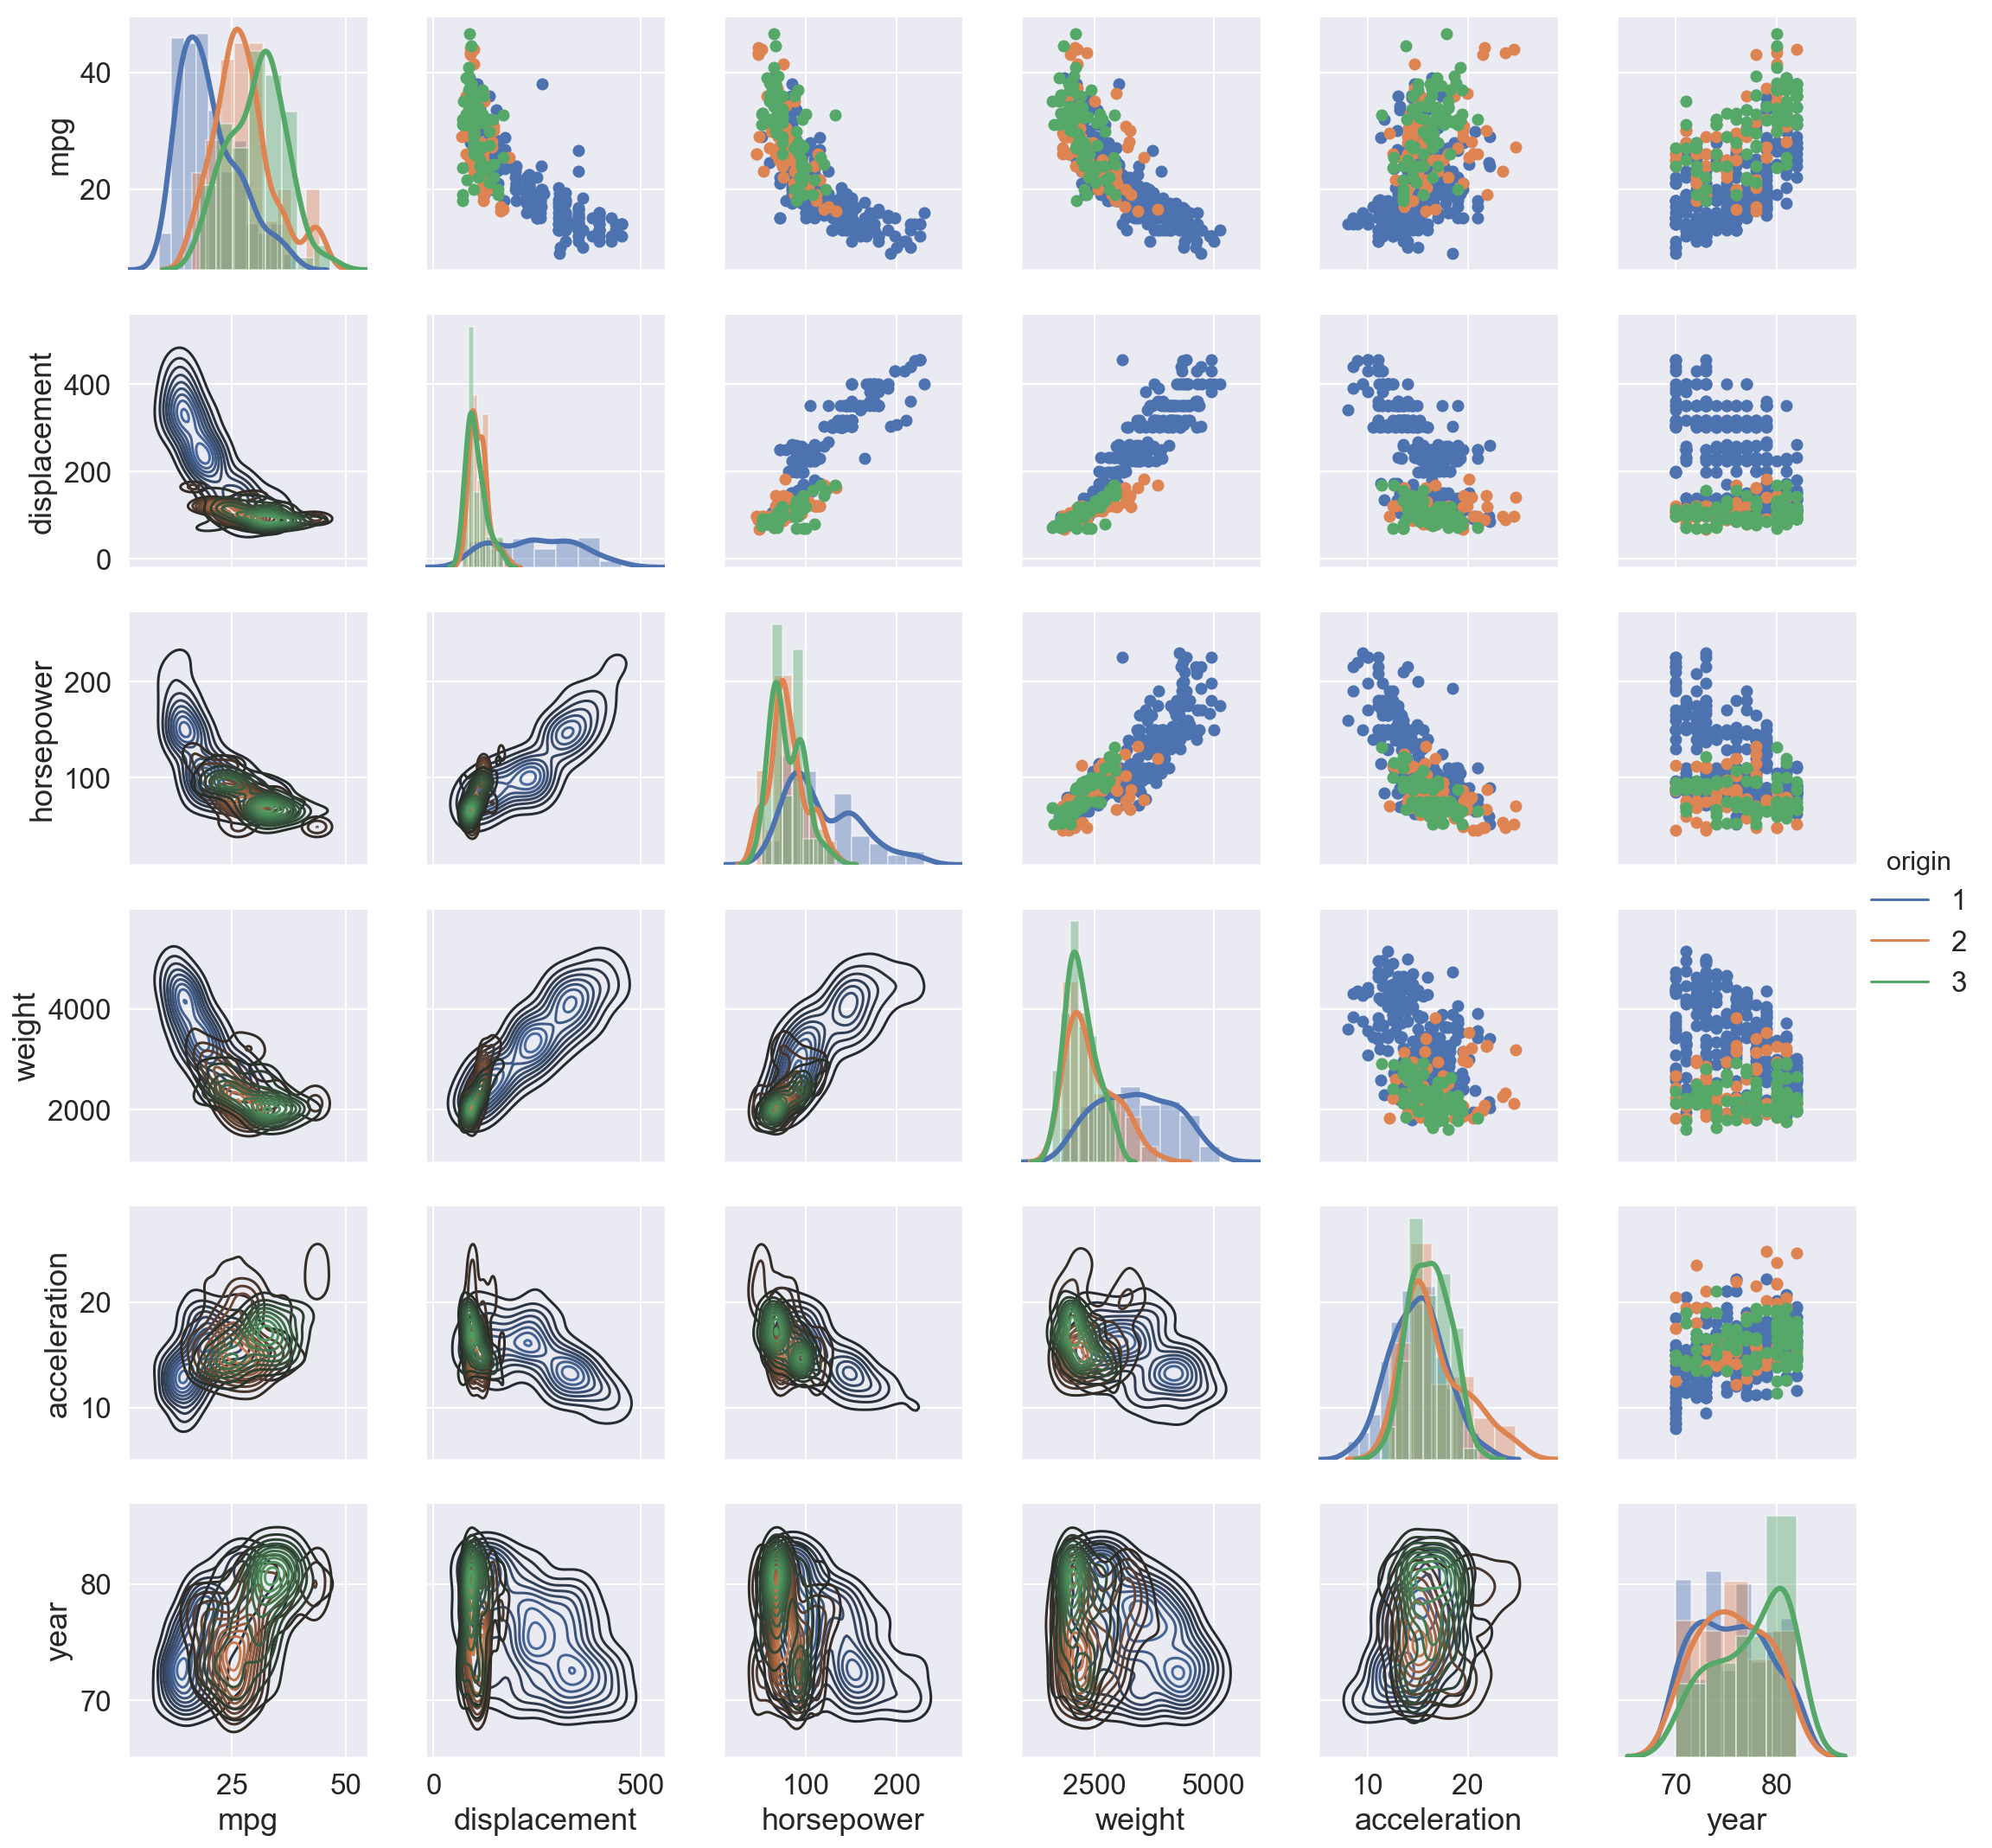

In [37]:
g = sns.PairGrid(df, hue="origin", x_vars=mask, y_vars=mask, diag_sharey=False)
g = g.map_diag(sns.distplot, kde_kws={'linewidth': 3})
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)
g = g.add_legend()